## Содержание
- [Описание проекта](#link1)
- [Описание данных](#link2)
- [Загрузка данных](#link3)
- [Предобработка данных](#link4)
- [Исследователсикй анализ данных](#link5)
- [Объединение данных](#link6)
- [Корреляционный анализ](#link7)
- [Использование пайпланов](#link8)
- [Анализ важности признаков](#link9)
- [Сегментация покупателей](#link10)
- [Общий вывод](#link11)

[Репозиторий проекта](https://github.com/olipalol/YP_ml_learning)

## Описание проекта 
<a id='link1'></a>

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 
Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.
 
## Описание данных 
<a id='link2'></a>


market_file.csv  - Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

market_money.csv - Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.

market_time.csv - Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
- минут — значение времени, проведённого на сайте, в минутах.

money.csv - Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.

## Импортирование библиотек

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
try:
    import phik
except ModuleNotFoundError:
    ! pip install phik -q
    import phik

In [4]:
try:
    import shap
except ModuleNotFoundError:
    ! pip install shap -q
    import shap

In [5]:
# !pip install scikit-learn==1.1.3 -q

In [6]:
# ! pip install -- upgrade scikit-learn

In [7]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.4.1.post1.


In [8]:
import seaborn as sns
print('The seaborn version is {}.'.format(sns.__version__))

The seaborn version is 0.13.2.


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import time
from scipy import stats as st

# загружаем нужные модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# загружаем классы для подготовки данных
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# импортируем классы для перебора параметров 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# загружаем функцию для работы с метриками
from sklearn.metrics import roc_auc_score, confusion_matrix

# загружаем класс pipeline
from sklearn.pipeline import Pipeline

# загружаем инструменты для анализа DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text 



In [10]:
def df_uni_describe(df):
    """
    универсальная функция для описания датафрейма
    """
    try:
        print("\033[1m" + 'Main info:' + "\033[0m")
        print("Number of variables:", len(df.columns))
        print("Number of observations:", len(df))
        print('Total missing: {:.2%}'.format(df.isna().sum().sum()/(len(df.columns)*len(df))))
        print('Total duplicates: {}'.format(df.duplicated().sum()))
#         print('Total size of dataFrame: {} MB.'.format(sys.getsizeof(df)/1000000)) #мой расчет не совпадаетс оценкой info, пометка чтобы разобратьсяв будущем.
        if df.isna().sum().sum() > 0:
            print("\033[1m" + 'Missing (NaNs), %' + "\033[0m")
            display(pd.DataFrame(round((df.isna().mean()*100),2).sort_values(ascending=False),\
                             columns=['NaNs, %']).style.format('{:.2f}').background_gradient('coolwarm'))
        print("\033[1m" + 'Info of dataframe:' + "\033[0m")
        display(df.info())
        print("\033[1m" + 'Head of dataframe:' + "\033[0m")
        display(df.head(2))
        display(df.describe())
    except: #я точно (наверное) обработаю разные ошибки потом
        print('Something wrong, contact the developer')

## Загрузка данных 
<a id='link3'></a>

In [11]:
df_market_file = pd.read_csv('./datasets/market_file.csv')
df_uni_describe(df_market_file)

Main info:
Number of variables: 13
Number of observations: 1300
Total missing: 0.00%
Total duplicates: 0
Info of dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1

None

Head of dataframe:


id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5

id  Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
count    1300.000000         1300.000000           1300.000000   1300.000000   
mean   215997.500000            4.253769              4.011538    601.898462   
std       375.421985            1.014814              0.696868    249.856289   
min    215348.000000            0.900000              3.000000    110.000000   
25%    215672.750000            3.700000              4.000000    405.500000   
50%    215997.500000            4.200000              4.000000    606.000000   
75%    216322.250000            4.900000              4.000000    806.000000   
max    216647.000000            6.600000              5.000000   1079.000000   

       Акционные_покупки  Средний_просмотр_категорий_за_визит  \
count        1300.000000                           1300.00000   
mean            0.319808                              3.27000   
std             0.249843                              1.35535   
min             0.000000                              1.00000   
25%             0.170000                              2.00000   
50%             0.240000                              3.00000   
75%             0.300000                              4.00000   
max             0.990000                              6.00000   

       Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
count                         1300.000000     1300.000000       1300.000000  
mean                             2.840000        4.185385          8.176923  
std                              1.971451        1.955298          3.978126  
min                              0.000000        0.000000          1.000000  
25%                              1.000000        3.000000          5.000000  
50%                              3.000000        4.000000          8.000000  
75%                              4.000000        6.000000         11.000000  
max                             10.000000        9.000000         20.000000

In [12]:
df_market_money = pd.read_csv('./datasets/market_money.csv')
df_uni_describe(df_market_money)

Main info:
Number of variables: 3
Number of observations: 3900
Total missing: 0.00%
Total duplicates: 0
Info of dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

Head of dataframe:


id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1

id        Выручка
count    3900.000000    3900.000000
mean   215997.500000    5025.696051
std       375.325686    1777.704104
min    215348.000000       0.000000
25%    215672.750000    4590.150000
50%    215997.500000    4957.500000
75%    216322.250000    5363.000000
max    216647.000000  106862.200000

In [13]:
df_market_time = pd.read_csv('./datasets/market_time.csv')
df_uni_describe(df_market_time)

Main info:
Number of variables: 3
Number of observations: 2600
Total missing: 0.00%
Total duplicates: 0
Info of dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

Head of dataframe:


id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13

id        минут
count    2600.000000  2600.000000
mean   215997.500000    13.336154
std       375.349754     4.080198
min    215348.000000     4.000000
25%    215672.750000    10.000000
50%    215997.500000    13.000000
75%    216322.250000    16.000000
max    216647.000000    23.000000

In [14]:
df_money = pd.read_csv('./datasets/money.csv', sep=';', decimal=',')
df_uni_describe(df_money)

Main info:
Number of variables: 2
Number of observations: 1300
Total missing: 0.00%
Total duplicates: 0
Info of dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

Head of dataframe:


id  Прибыль
0  215348     0.98
1  215349     4.16

id      Прибыль
count    1300.000000  1300.000000
mean   215997.500000     3.996631
std       375.421985     1.013722
min    215348.000000     0.860000
25%    215672.750000     3.300000
50%    215997.500000     4.045000
75%    216322.250000     4.670000
max    216647.000000     7.430000

Вывод по загрузке:
- полных дублей нет
- пропусков нет

## Предобработка данных
<a id='link4'></a>

### Обработка категориальных столбцов

Как видели выше пропусков в данных нет. 
Проверим на неявные категориальные столбцы и удалим явные дубликаты.

In [15]:
mf_cat = df_market_file.select_dtypes(include=['object']).columns
for col in mf_cat:
    print(col, ':', df_market_file[col].unique())

Покупательская активность : ['Снизилась' 'Прежний уровень']
Тип сервиса : ['премиум' 'стандартт' 'стандарт']
Разрешить сообщать : ['да' 'нет']
Популярная_категория : ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


In [16]:
# заменим опечатки в параметре "Тип сервиса" 
df_market_file.loc[df_market_file['Тип сервиса']=='стандартт', 'Тип сервиса'] = 'стандарт'
df_market_file['Тип сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [17]:
df_market_money['Период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [18]:
df_market_money['Период'].value_counts()

Период
препредыдущий_месяц    1300
текущий_месяц          1300
предыдущий_месяц       1300
Name: count, dtype: int64

Судя по количеству данных и тем что выручка за 3 месяца , "препредыдущий_месяц" тут имеется ввиду не опечатка два раза "пре", а "предпредыдущий_месяц"

In [19]:
df_market_money.loc[df_market_money['Период']=='препредыдущий_месяц', 'Период'] = 'предпредыдущий_месяц'
df_market_money['Период'].unique()

array(['предпредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [20]:
df_market_time['Период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

In [21]:
df_market_time['Период'].value_counts()

Период
текущий_месяц       1300
предыдцщий_месяц    1300
Name: count, dtype: int64

In [22]:
df_market_time.loc[df_market_time['Период']=='предыдцщий_месяц', 'Период'] = 'предыдущий_месяц'
df_market_time['Период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

Вывод: поправили значения данных, опечатки в них в датафреймах

### Обработка числовых столбцов

Оценим количественные данные на выбросы. 

In [23]:
def show_box_hist(col, bins=10):
    '''
    Функция которая строит для количественного параметра гистограмму и боксплот
    '''
    print('Описание данных в колонке {}'.format(col.name))
    display(col.describe())
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    fig.suptitle('Оценим на выбросы параметр из списка: {}'.format(col.name))
    col.plot(kind='hist', bins=bins, ax=axes[0])
    axes[0].set_title('Гистограмма распределения')
    col.plot(kind='box', ax=axes[1], rot=45)
    axes[1].set_title('Разброс значений признаков')
    plt.show()

Описание данных в колонке Маркет_актив_6_мес


count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: Маркет_актив_6_мес, dtype: float64

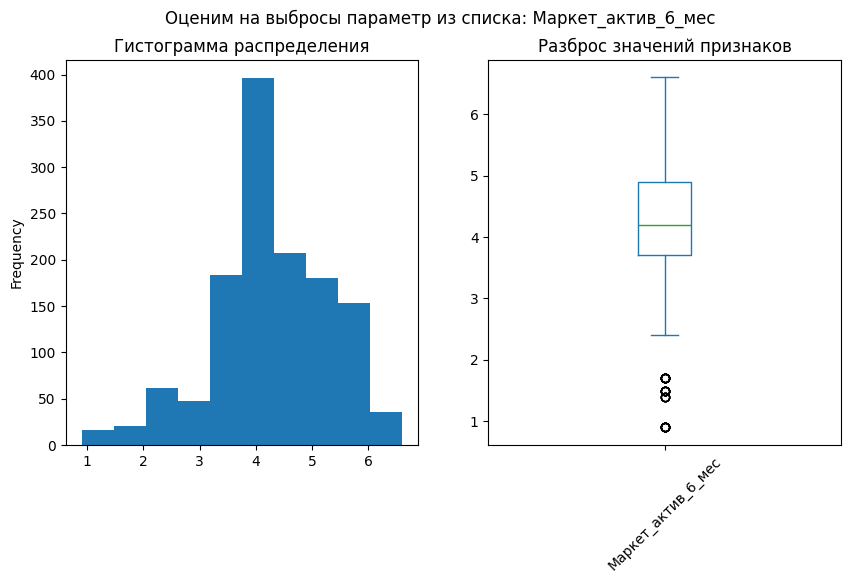

Описание данных в колонке Маркет_актив_тек_мес


count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Маркет_актив_тек_мес, dtype: float64

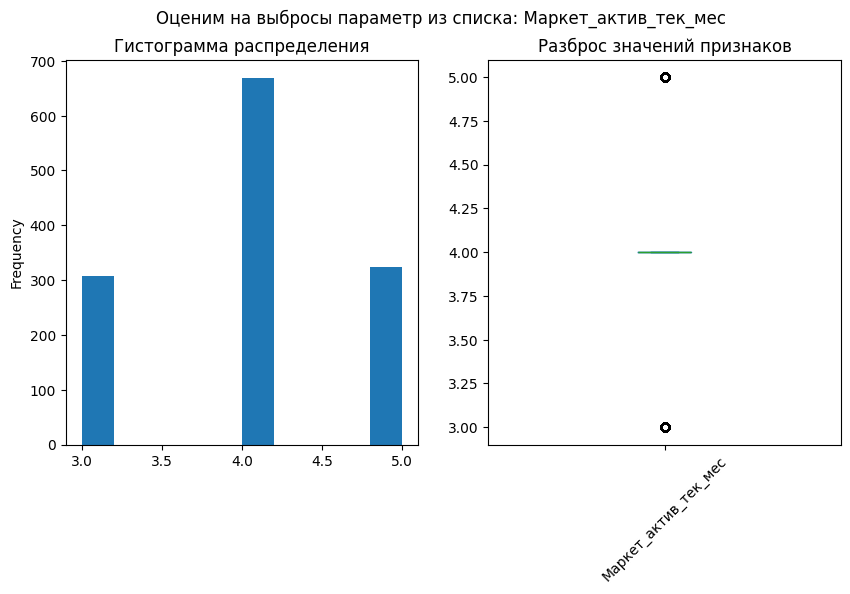

Описание данных в колонке Длительность


count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: Длительность, dtype: float64

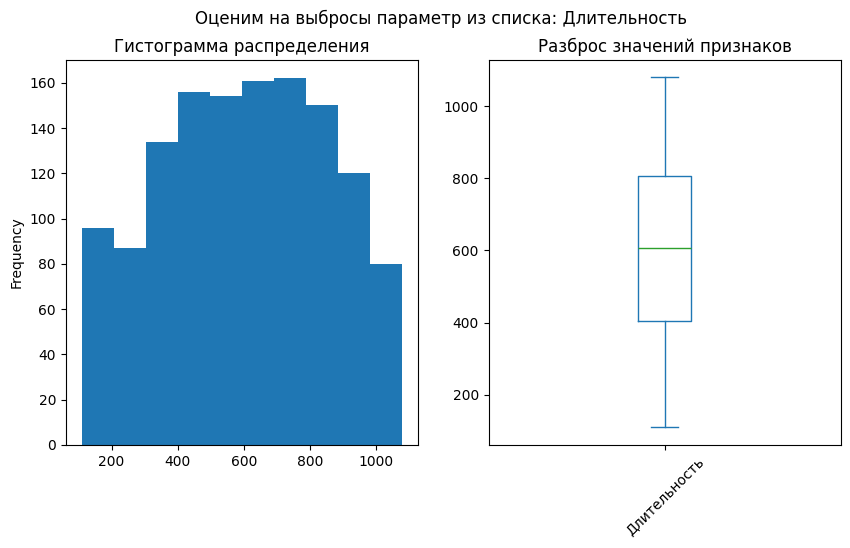

Описание данных в колонке Акционные_покупки


count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: Акционные_покупки, dtype: float64

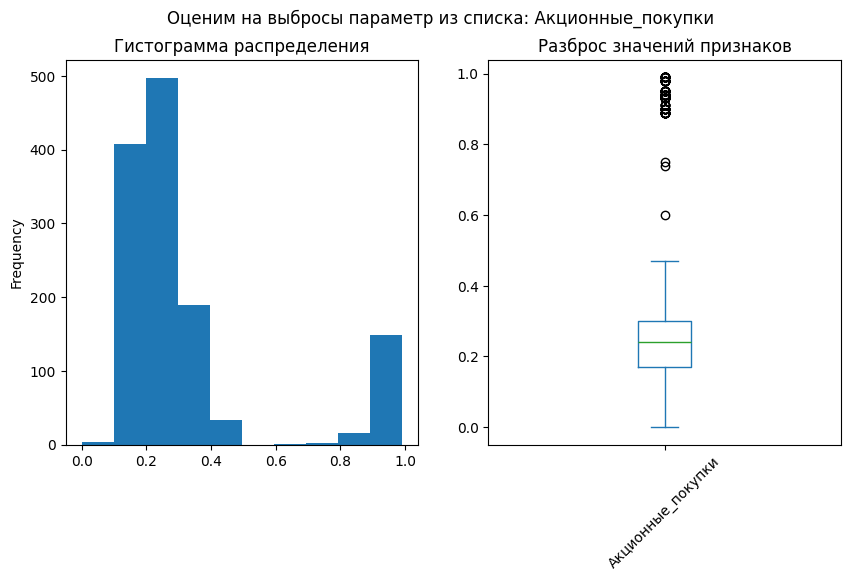

Описание данных в колонке Средний_просмотр_категорий_за_визит


count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: Средний_просмотр_категорий_за_визит, dtype: float64

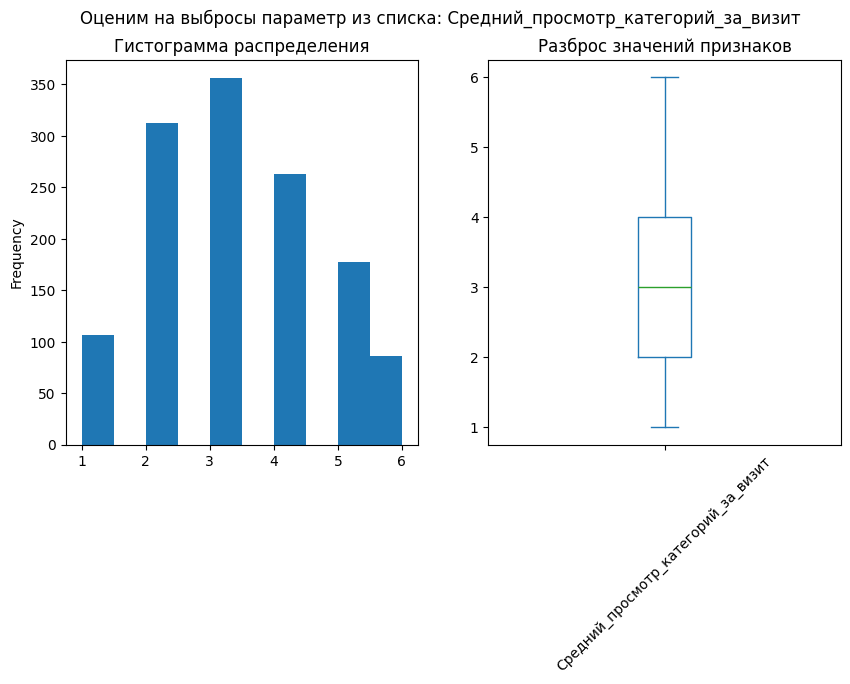

Описание данных в колонке Неоплаченные_продукты_штук_квартал


count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: Неоплаченные_продукты_штук_квартал, dtype: float64

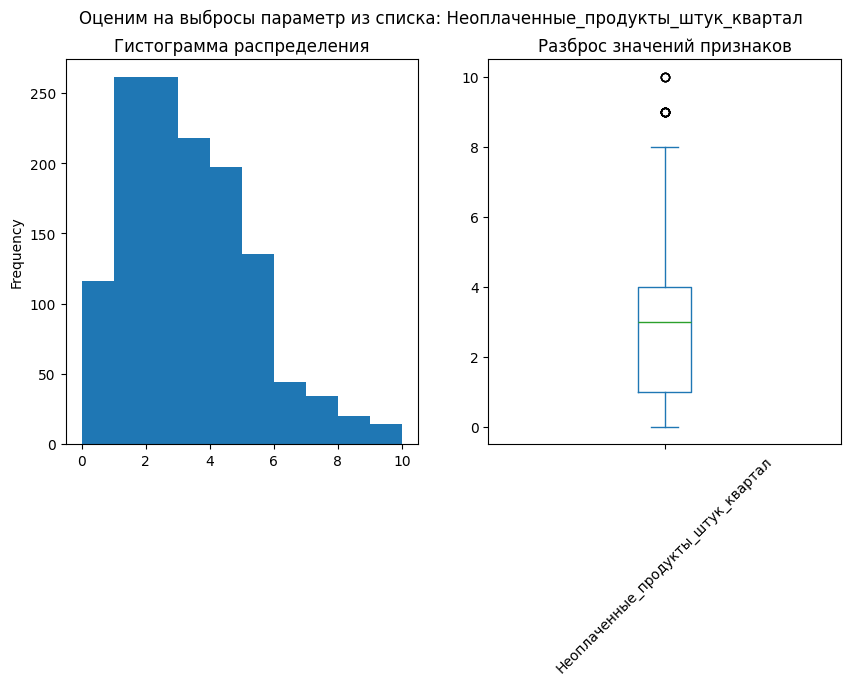

Описание данных в колонке Ошибка_сервиса


count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: Ошибка_сервиса, dtype: float64

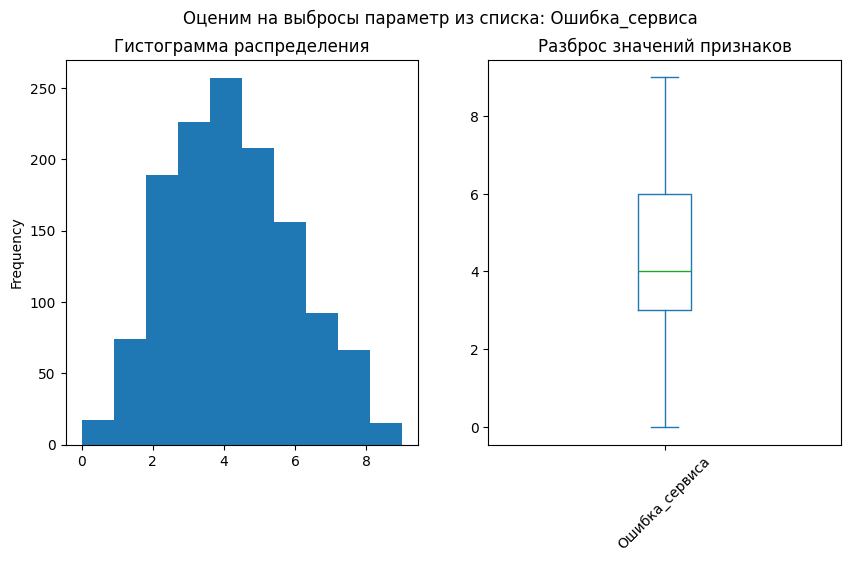

Описание данных в колонке Страниц_за_визит


count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: Страниц_за_визит, dtype: float64

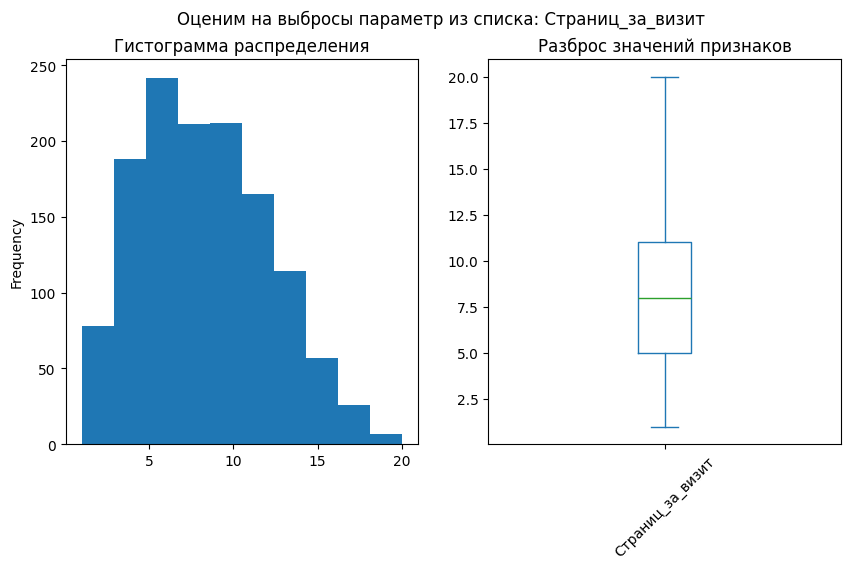

In [24]:
mf_num = df_market_file.select_dtypes(include=['int', 'float']).columns
for col in mf_num[1:]: #колонку id не рассматриваем
    show_box_hist(df_market_file[col])

Не наблюдается аномальных значений - все выборосы можно объяснить логически.


Описание данных в колонке Выручка


count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: Выручка, dtype: float64

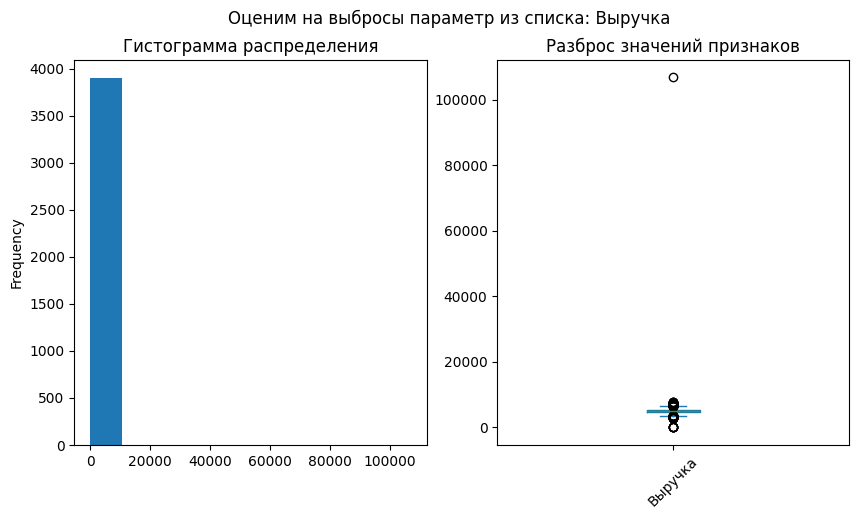

(3900, 3)


In [25]:
mm_num = df_market_money.select_dtypes(include=['int', 'float']).columns
for col in mm_num[1:]: #колонку id не рассматриваем
    show_box_hist(df_market_money[col])
print(df_market_money.shape)

Есть 1 аномальное значение по выручке - 106862, удалим его

(3899, 3)
Описание данных в колонке Выручка


count    3899.00000
mean     4999.57743
std       706.99988
min         0.00000
25%      4590.10000
50%      4957.00000
75%      5363.00000
max      7799.40000
Name: Выручка, dtype: float64

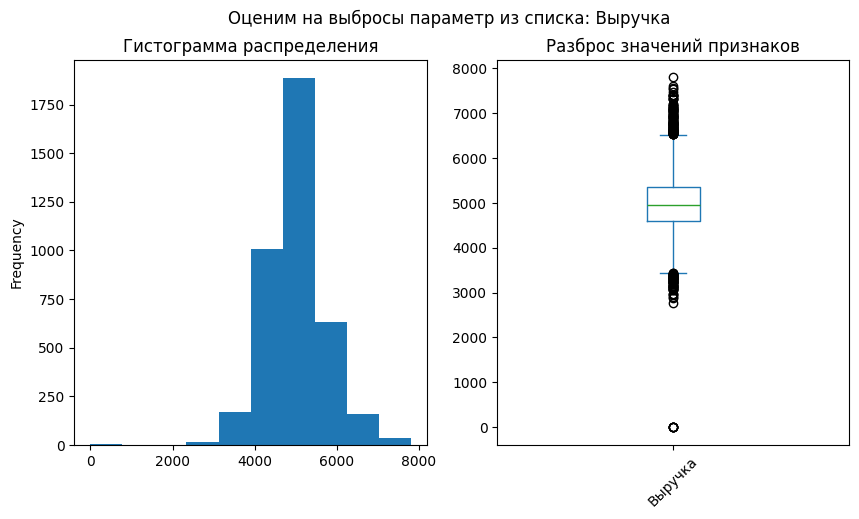

In [26]:
df_market_money = df_market_money.loc[df_market_money['Выручка'] < 106862]
print(df_market_money.shape)
show_box_hist(df_market_money['Выручка'])

In [27]:
df_market_money.loc[df_market_money['Выручка'] == 0]

id                Период  Выручка
0   215348  предпредыдущий_месяц      0.0
2   215348      предыдущий_месяц      0.0
28  215357  предпредыдущий_месяц      0.0
29  215357      предыдущий_месяц      0.0
34  215359      предыдущий_месяц      0.0
35  215359  предпредыдущий_месяц      0.0

Вполне ок что есть покупатели без покупок в последние 3 месяца

Описание данных в колонке минут


count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64

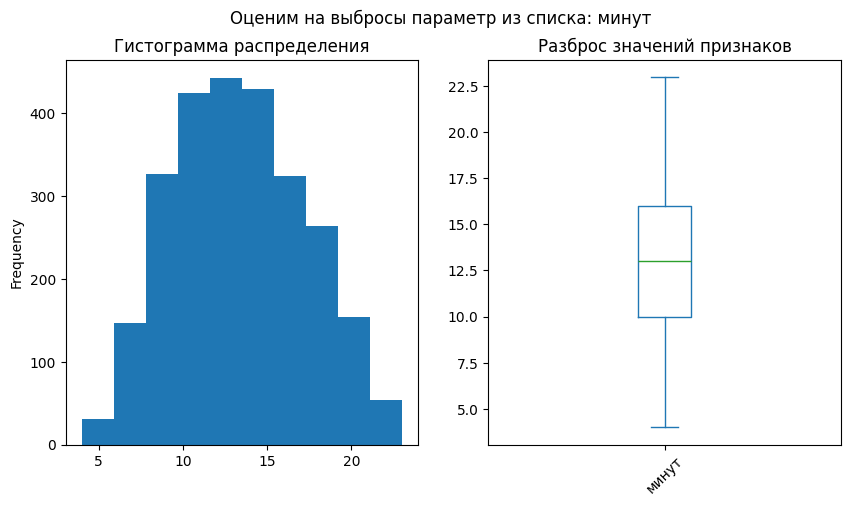

In [28]:
show_box_hist(df_market_time['минут'])

Описание данных в колонке Прибыль


count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: Прибыль, dtype: float64

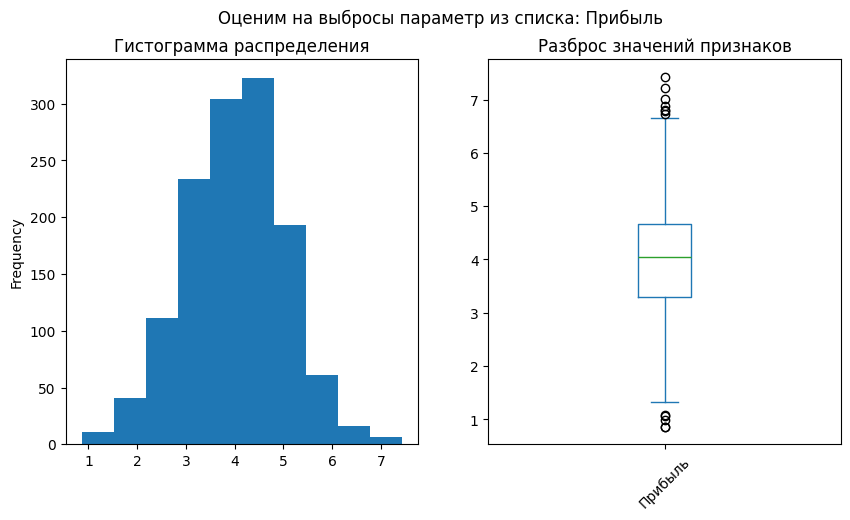

In [29]:
show_box_hist(df_money['Прибыль'])

In [30]:
df_money['Прибыль'].value_counts()

Прибыль
3.89    11
4.18     9
4.28     9
5.10     9
4.33     8
        ..
2.63     1
2.61     1
1.37     1
1.55     1
6.11     1
Name: count, Length: 400, dtype: int64

Значения прибыли слишком маленькие, вероятно они считаются в тыс. рублей. Это нужно уточннить у поставщика данных. Если заказчик скажет что мы правы то перевем в рубли. Пока создадим новый столбец

Описание данных в колонке Прибыль, руб


count    1300.000000
mean     3996.630769
std      1013.722112
min       860.000000
25%      3300.000000
50%      4045.000000
75%      4670.000000
max      7430.000000
Name: Прибыль, руб, dtype: float64

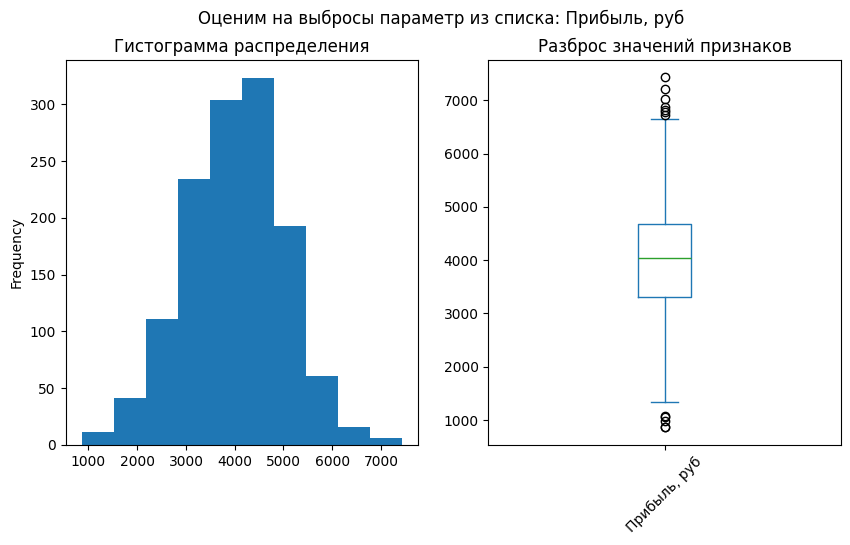

In [31]:
df_money['Прибыль, руб'] = df_money['Прибыль']*1000
show_box_hist(df_money['Прибыль, руб'])

### Выводы по предобработке данных
 - убрали выбросы в Выручке
 - убрали опчеатки в значения колонки Период
 - отметили что в колонке df_money['Прибыль'] тыс. рублей, и возможно надо их переводить в рубли

## Исследовательский анализ данных 
<a id='link5'></a>

In [32]:
#настроим отображение чисел в удобный для чтения формат
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(rc={'figure.figsize':(10,8)})
warnings.filterwarnings('ignore')

In [33]:
# Оценим категориальные данные
def cat_col_pie(col):
    """
    Функция которая строит круговую и столбиковую диаграммы для количественного параметра
    """
    print('Кол-во значение в колонке {}'.format(col.name))
    display(col.value_counts())
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    fig.suptitle('Оценим доли по значениям в категориальных параметрах: {}'.format(col.name))
    col.value_counts().plot(kind='pie', ax=axes[0], y=col.name, autopct="%.1f%%")
    axes[0].set_title('Доли по категориям')
    col.value_counts().plot(kind='barh', ax=axes[1], rot=0)
    axes[1].set_title('Количество в группах')
    plt.tight_layout() #автоподбор отступов между графикамиа
    plt.show()

Кол-во значение в колонке Покупательская активность


Покупательская активность
Прежний уровень    802
Снизилась          498
Name: count, dtype: int64

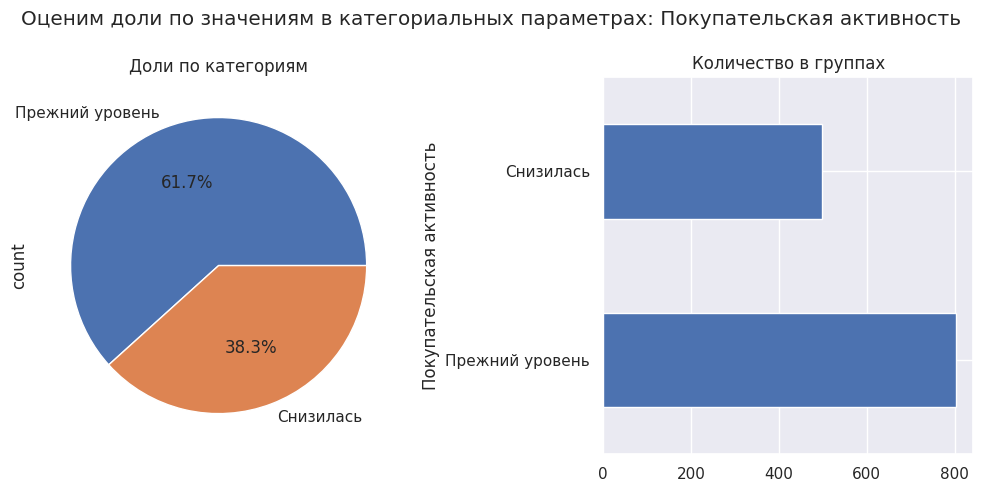

Кол-во значение в колонке Тип сервиса


Тип сервиса
стандарт    924
премиум     376
Name: count, dtype: int64

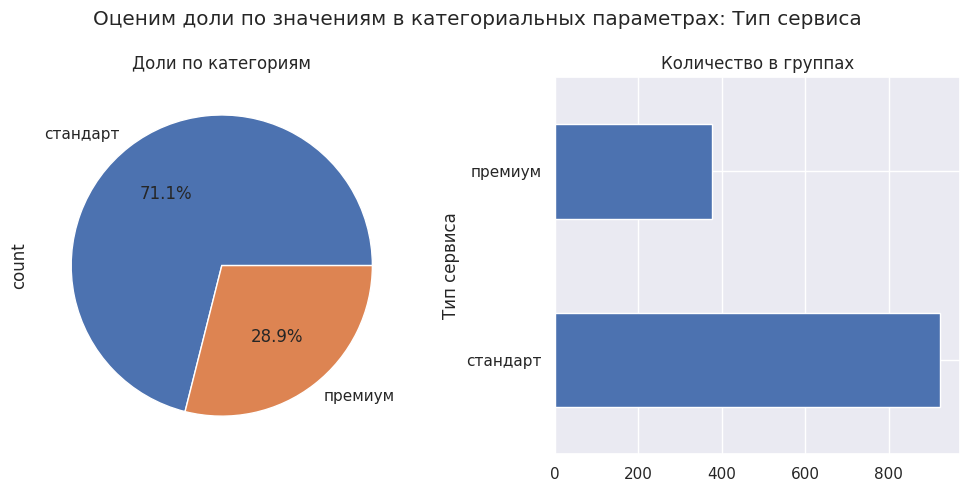

Кол-во значение в колонке Разрешить сообщать


Разрешить сообщать
да     962
нет    338
Name: count, dtype: int64

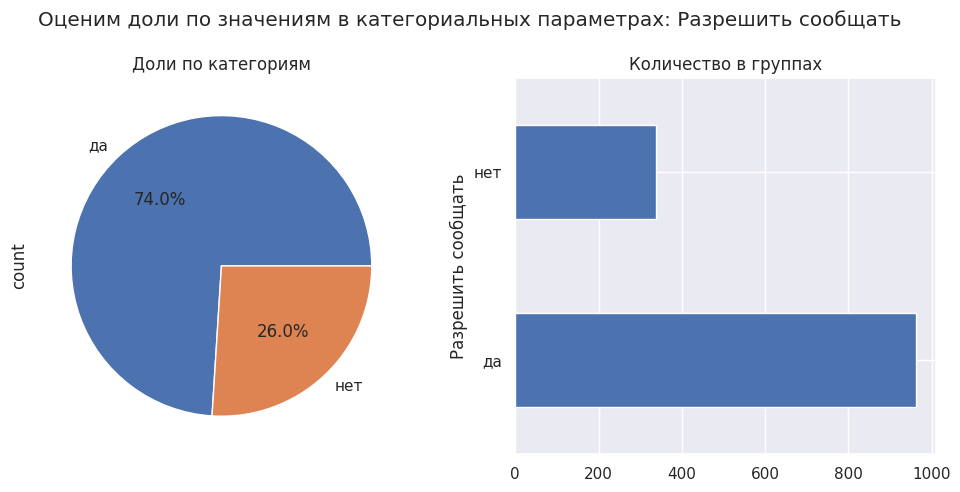

In [34]:
for col in mf_cat[:-1]:
    cat_col_pie(df_market_file[col])

Популярная_категория
Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: count, dtype: int64

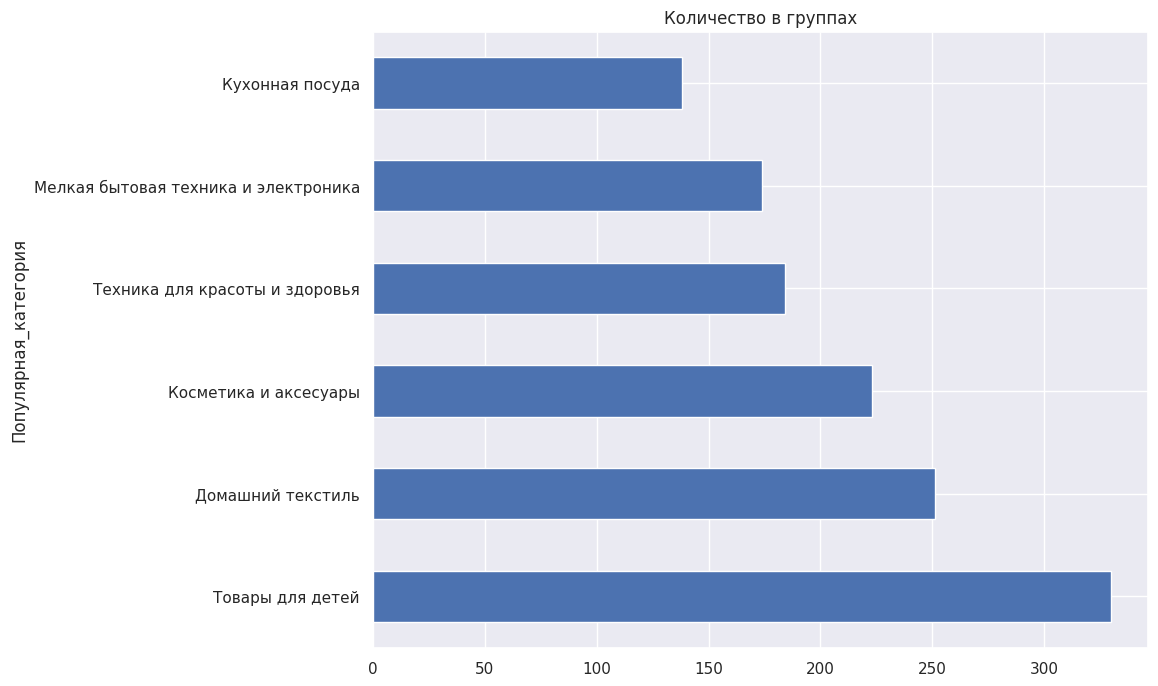

In [35]:
display(df_market_file['Популярная_категория'].value_counts())
df_market_file['Популярная_категория'].value_counts().plot(kind='barh', rot=0, title='Количество в группах')
plt.show()

Что видно о данных из предыдущих графиков:
   - Близким к нормальному распределены данные в колонках:
        - Маркет_актив_6_мес
        - Маркет_актив_тек_мес
        - Средний_просмотр_категорий_за_визит
        - Длительность
        - Ошибка_сервиса
        - Выручка/Прибыль
        - минут
        
   - Неоплаченные_продукты_штук_квартал и Страниц_за_визит имеют распределение  похожее на распределение Пуассона
   - У 38% покупаетелей Покупательская активность снизилась
   - У 28% покупателй тип сервиса "премиум"
   - 26% покупателей запретили маркетинговые сообщения
   - Популярные категории товаров имеют не сильно большой разброс между собой, самая популярная категория "Товары для детей" - 25,4%, наименее популярная - 10,6%
   - есть id с которыми не коммуницировали почти или мало (меньше 2х коммуникаций)
   - есть категория покупателй что может использовать корзину как список покупок для оффлайна или отслеживать там акционные предложения, не оплачивая товар.
   

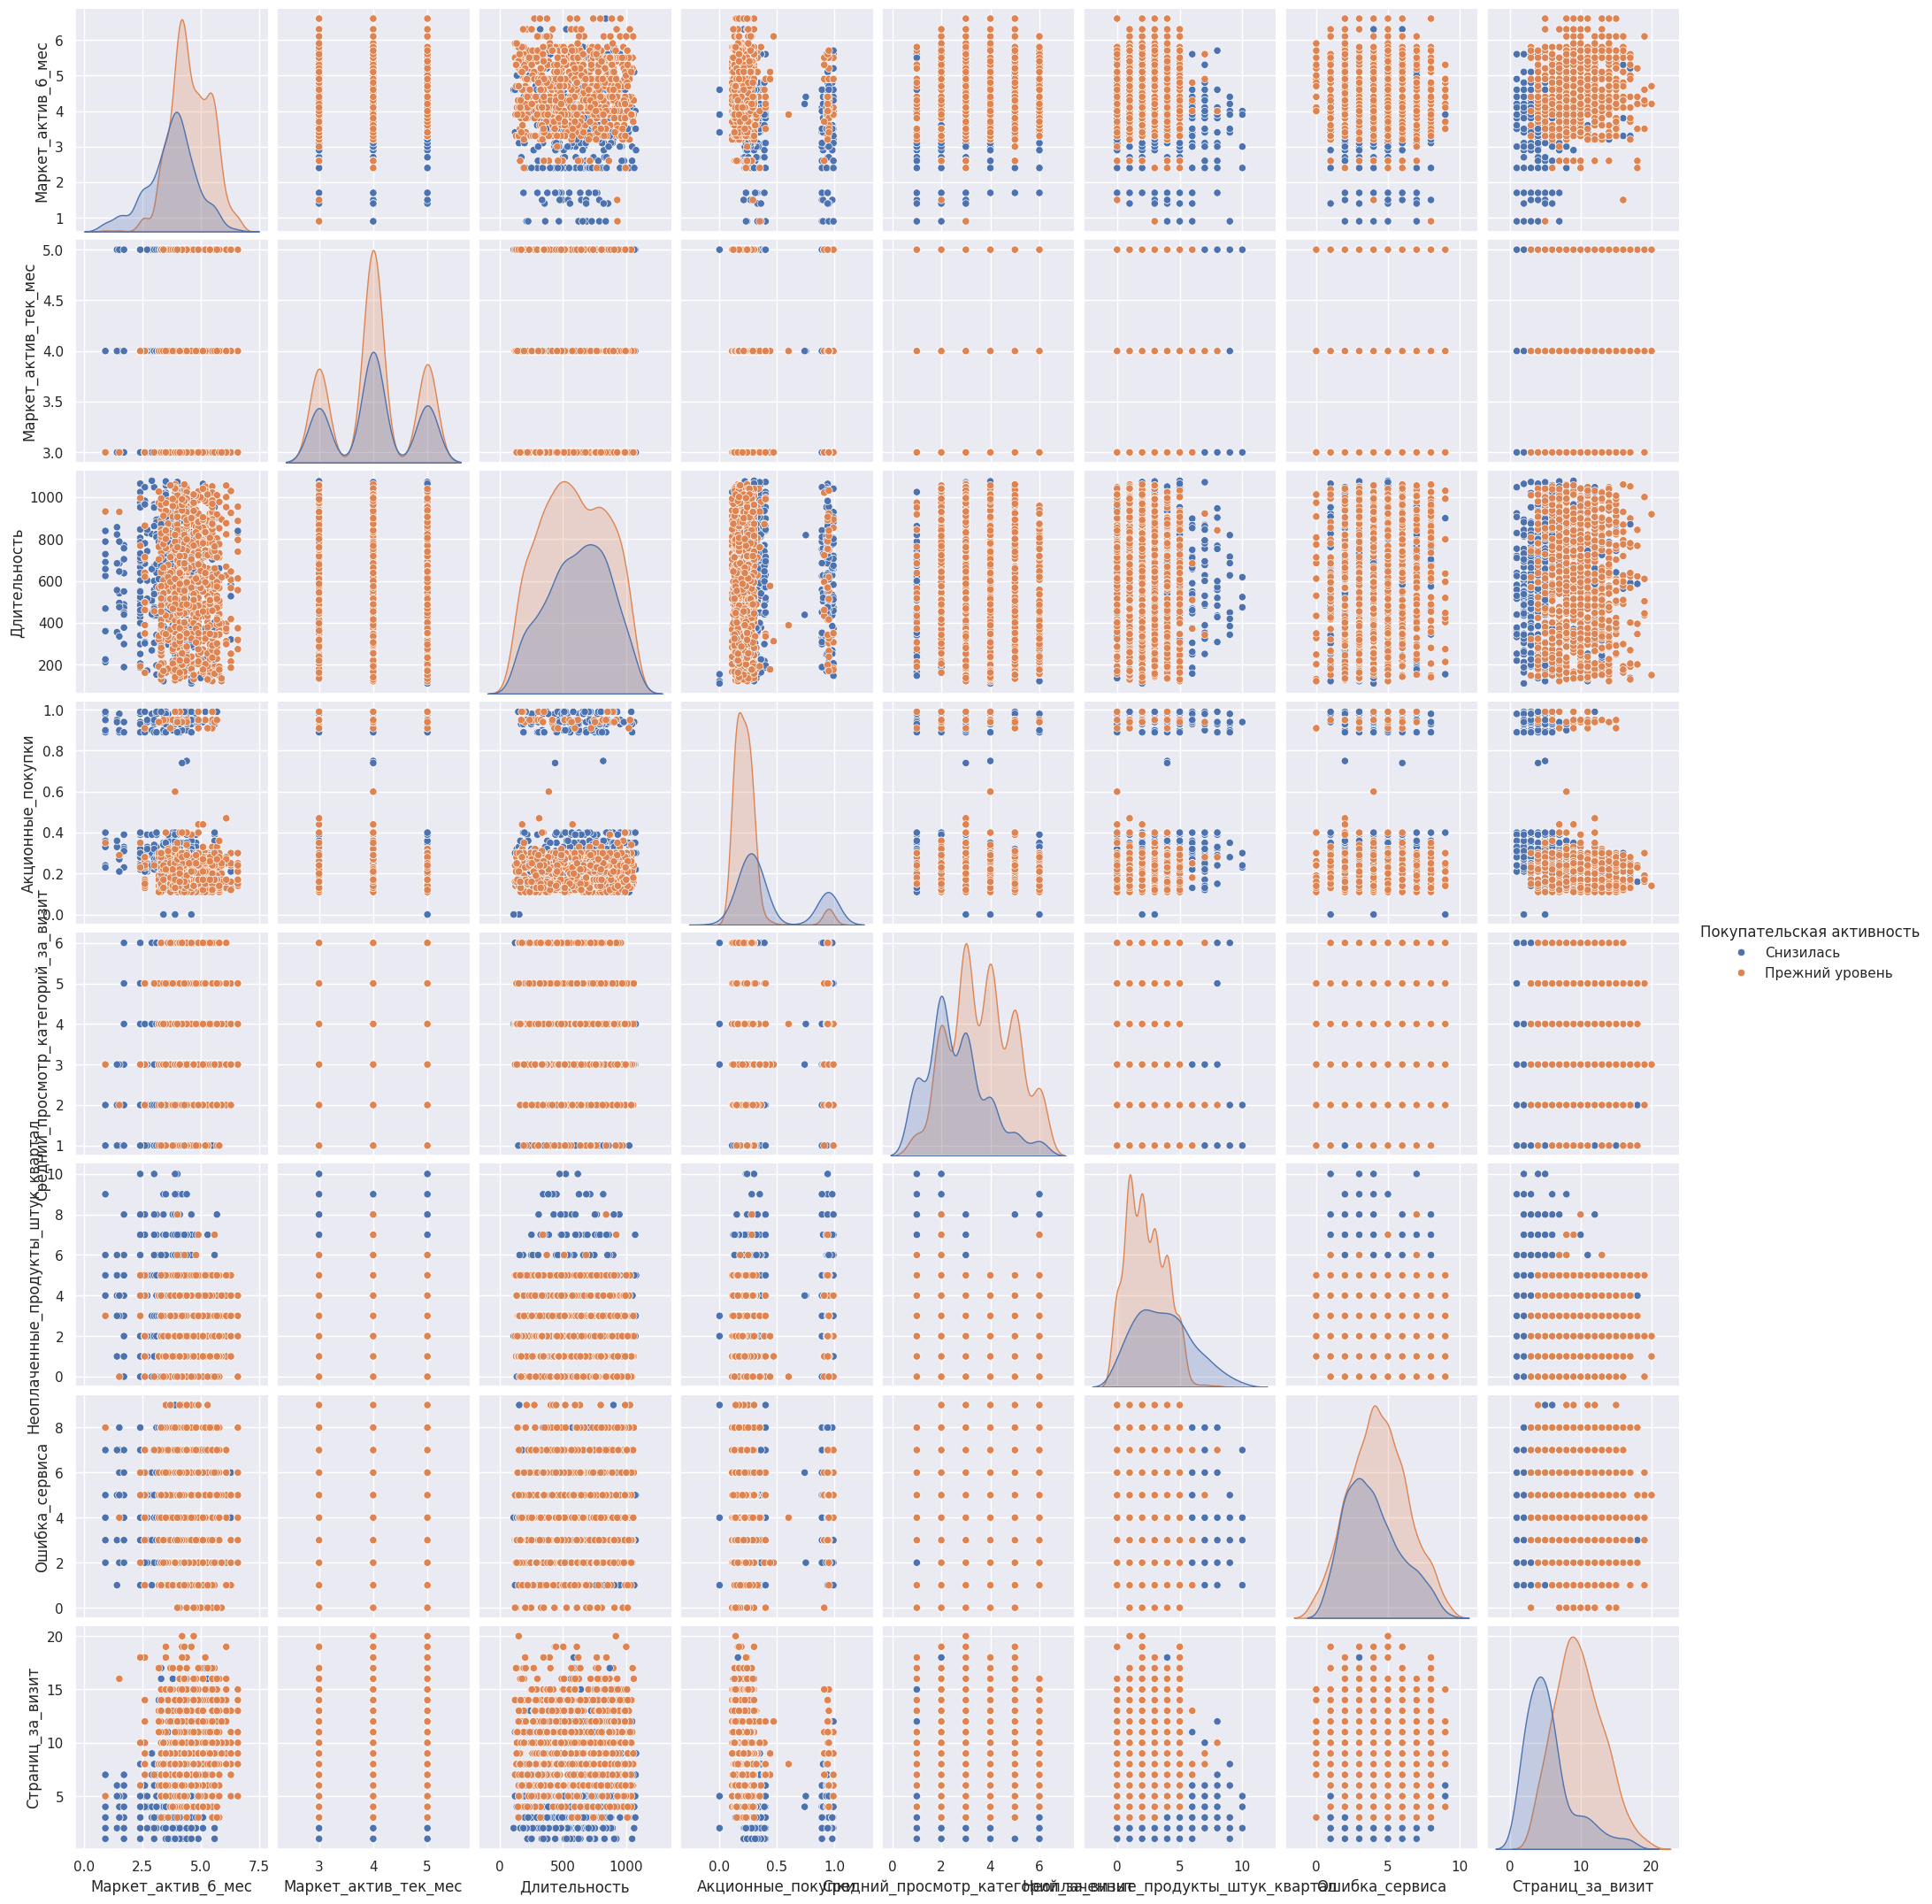

In [36]:
ax = sns.pairplot(data=df_market_file.iloc[:,1:], hue='Покупательская активность')
ax.fig.set_size_inches(22,22)

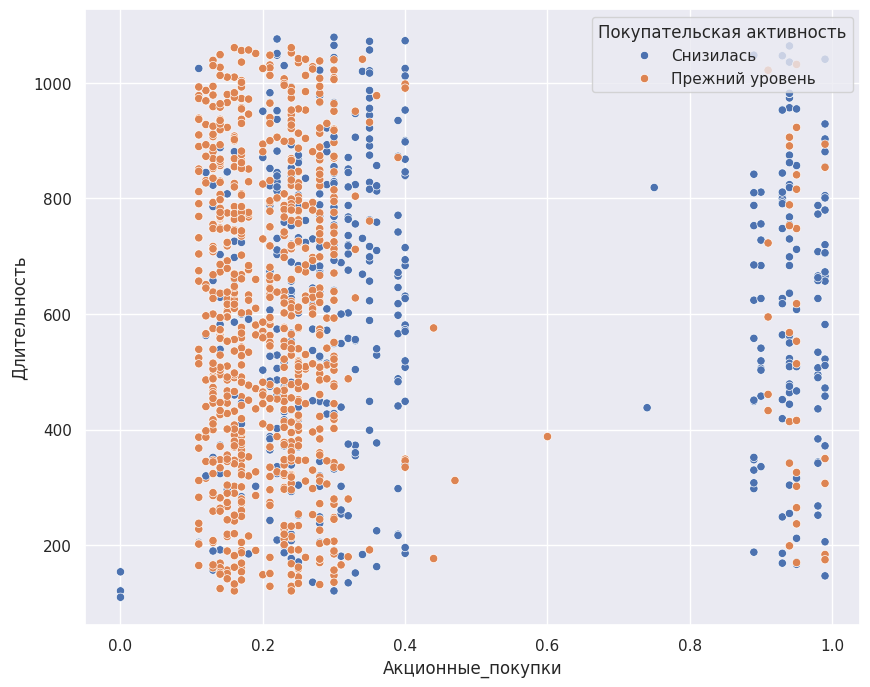

In [37]:
ax = sns.scatterplot(data=df_market_file.iloc[:,1:], x='Акционные_покупки', y='Длительность', hue='Покупательская активность')

Выводы из графика:
- можно выделить 2 типа покупателей "Охотники за акциями" (>0.6) и "обычные покупатели", этот параметр можно будет перевести в категориальный, или 3 типа:  до 0.3, 0.3-0.6, более 0.6
- линейной зависимости между признаками не наблюдается
- покупательская активность снизилась больше у тех у кого было больше марктеинговых коммуникаций в текущем месяце. Вероятно уже есть коммуникации с теми кто мало покупает? Не будет ли тут утечик признака?
- маркетинговая активность за 6 месяцев в среднем меньше у тех кто снизил покупательскую активность- 
- меньше просмотров категорий - меньше покупательская активность
- меньше страниц за визит, больше вероятнсть снижения покупательской активности
- большие значения в неоплаченных продуктамх в шт чаще дают снижение покупательской активности

Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период

In [38]:
df_market_money.shape

(3899, 3)

In [39]:
id_list = df_market_money.loc[df_market_money['Выручка'] == 0, 'id'].unique()
print("Удалим следующие id:", id_list)

Удалим следующие id: [215348 215357 215359]


In [40]:
df_market_money = df_market_money.query("~id.isin(@id_list)")
df_market_money.shape

(3890, 3)

### Выводы по разделу
- Близким к нормальному распределены данные в колонках:
    - Маркет_актив_6_мес
    - Маркет_актив_тек_мес
    - Средний_просмотр_категорий_за_визит
    - Длительность
    - Ошибка_сервиса
    - Выручка/Прибыль
    - минут
- Неоплаченные_продукты_штук_квартал и Страниц_за_визит имеют распределение  похожее на распределение Пуассона
- У 38% покупаетелей Покупательская активность снизилась
- У 28% покупателй тип сервиса "премиум"
- 26% покупателей запретили маркетинговые сообщения
- Популярные категории товаров имеют не сильно большой разброс между собой, самая популярная категория "Товары для детей" - 25,4%, наименее популярная - 10,6%
- можно выделить 2 типа покупателей "Охотники за акциями" и "обычные покупатели", этот параметр можно будет перевести в категориальный
- линейной зависимости между признаками не наблюдается
- покупательская активность снизилась больше у тех у кого было больше марктеинговых коммуникаций в текущем месяце. Вероятно уже есть коммуникации с теми кто мало покупает? Не будет ли тут утечик признака?
- маркетинговая активность за 6 месяцев в среднем меньше у тех кто снизил покупательскую активность- 
- меньше просмотров категорий - меньше покупательская активность
- меньше страниц за визит, больше вероятнсть снижения покупательской активности
- большие значения в неоплаченных продуктамх в шт чаще дают снижение покупательской активности

## Объединение данных 
<a id='link6'></a>

In [41]:
df_mm_pivoted = pd.pivot(df_market_money, values='Выручка', columns='Период', index='id').reset_index()
col_to_rename = {'предпредыдущий_месяц' : 'Выручка_предпредыдущий', 'предыдущий_месяц' : 'Выручка_предыдущий', 
                 'текущий_месяц' : 'Выручка_текущий'}
df_mm_pivoted = df_mm_pivoted.rename(columns=col_to_rename)
df_mm_pivoted.head()

Период      id  Выручка_предпредыдущий  Выручка_предыдущий  Выручка_текущий
0       215349                 4472.00             5216.00          4971.60
1       215350                 4826.00             5457.50          5058.40
2       215351                 4793.00             6158.00          6610.40
3       215352                 4594.00             5807.50          5872.50
4       215353                 5124.00             4738.50          5388.50

In [42]:
df_mt_pivoted = pd.pivot(df_market_time, values='минут', columns='Период', index='id').reset_index()
col_to_rename = {'предыдущий_месяц' : 'Минут_предыдущий', 'текущий_месяц' : 'Минут_текущий'}
df_mt_pivoted = df_mt_pivoted.rename(columns=col_to_rename)
df_mt_pivoted.head()

Период      id  Минут_предыдущий  Минут_текущий
0       215348                13             14
1       215349                12             10
2       215350                 8             13
3       215351                11             13
4       215352                 8             11

In [43]:
df_all = pd.merge(df_market_file, df_mt_pivoted, on='id')
print(df_all.shape)
df_all.head()

(1300, 15)


id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась    стандарт                нет   
3  215351                 Снизилась    стандарт                 да   
4  215352                 Снизилась    стандарт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                3.40                     5           121               0.00   
1                4.40                     4           819               0.75   
2                4.90                     3           539               0.14   
3                3.20                     5           896               0.99   
4                5.10                     3          1064               0.94   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
0                                   2               1                 5   
1                                   4               2                 5   
2                                   2               1                 5   
3                                   0               6                 4   
4                                   2               3                 2   

   Минут_предыдущий  Минут_текущий  
0                13             14  
1                12             10  
2                 8             13  
3                11             13  
4                 8             11

In [44]:
df_all = pd.merge(df_all, df_mm_pivoted, on='id')
print(df_all.shape) # так как мы убрали 3 id у которых были 0 покупки в течение 3 месяцев, то должно стать на 3 строки меньше
df_all.head()

(1297, 18)


id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215349                 Снизилась     премиум                 да   
1  215350                 Снизилась    стандарт                нет   
2  215351                 Снизилась    стандарт                 да   
3  215352                 Снизилась    стандарт                нет   
4  215353                 Снизилась    стандарт                 да   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                4.40                     4           819               0.75   
1                4.90                     3           539               0.14   
2                3.20                     5           896               0.99   
3                5.10                     3          1064               0.94   
4                3.30                     4           762               0.26   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    4   
1    Домашний текстиль                                    5   
2     Товары для детей                                    5   
3     Товары для детей                                    3   
4    Домашний текстиль                                    4   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
0                                   4               2                 5   
1                                   2               1                 5   
2                                   0               6                 4   
3                                   2               3                 2   
4                                   1               1                 4   

   Минут_предыдущий  Минут_текущий  Выручка_предпредыдущий  \
0                12             10                 4472.00   
1                 8             13                 4826.00   
2                11             13                 4793.00   
3                 8             11                 4594.00   
4                10             10                 5124.00   

   Выручка_предыдущий  Выручка_текущий  
0             5216.00          4971.60  
1             5457.50          5058.40  
2             6158.00          6610.40  
3             5807.50          5872.50  
4             4738.50          5388.50

In [45]:
# Проверим не нарушилась ли размерность
print("Была размерность до объединения данных:", df_market_file.shape)

Была размерность до объединения данных: (1300, 13)


## Корреляционный анализ
<a id='link7'></a>

Выше мы видели что Акционные_покупки можно разделить на 2 или 3 кластера примерно, добавим категориальный признак акционный покупатель, любитель акций или нет. Разделим на 2 группу на основе данных на [графике](#scatter1):

In [46]:
def cutomer_type(val):
    if val <= 0.3:
        return 'Мало_акционных'
    elif val <= 0.6:
        return 'Средне_акционных'
    else:
        return 'Много_акционных'
    
df_all['Тип покупателя'] = df_all['Акционные_покупки'].apply(cutomer_type)
df_all['Тип покупателя'].unique()

array(['Много_акционных', 'Мало_акционных', 'Средне_акционных'],
      dtype=object)

interval columns not set, guessing: ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'Минут_предыдущий', 'Минут_текущий', 'Выручка_предпредыдущий', 'Выручка_предыдущий', 'Выручка_текущий']


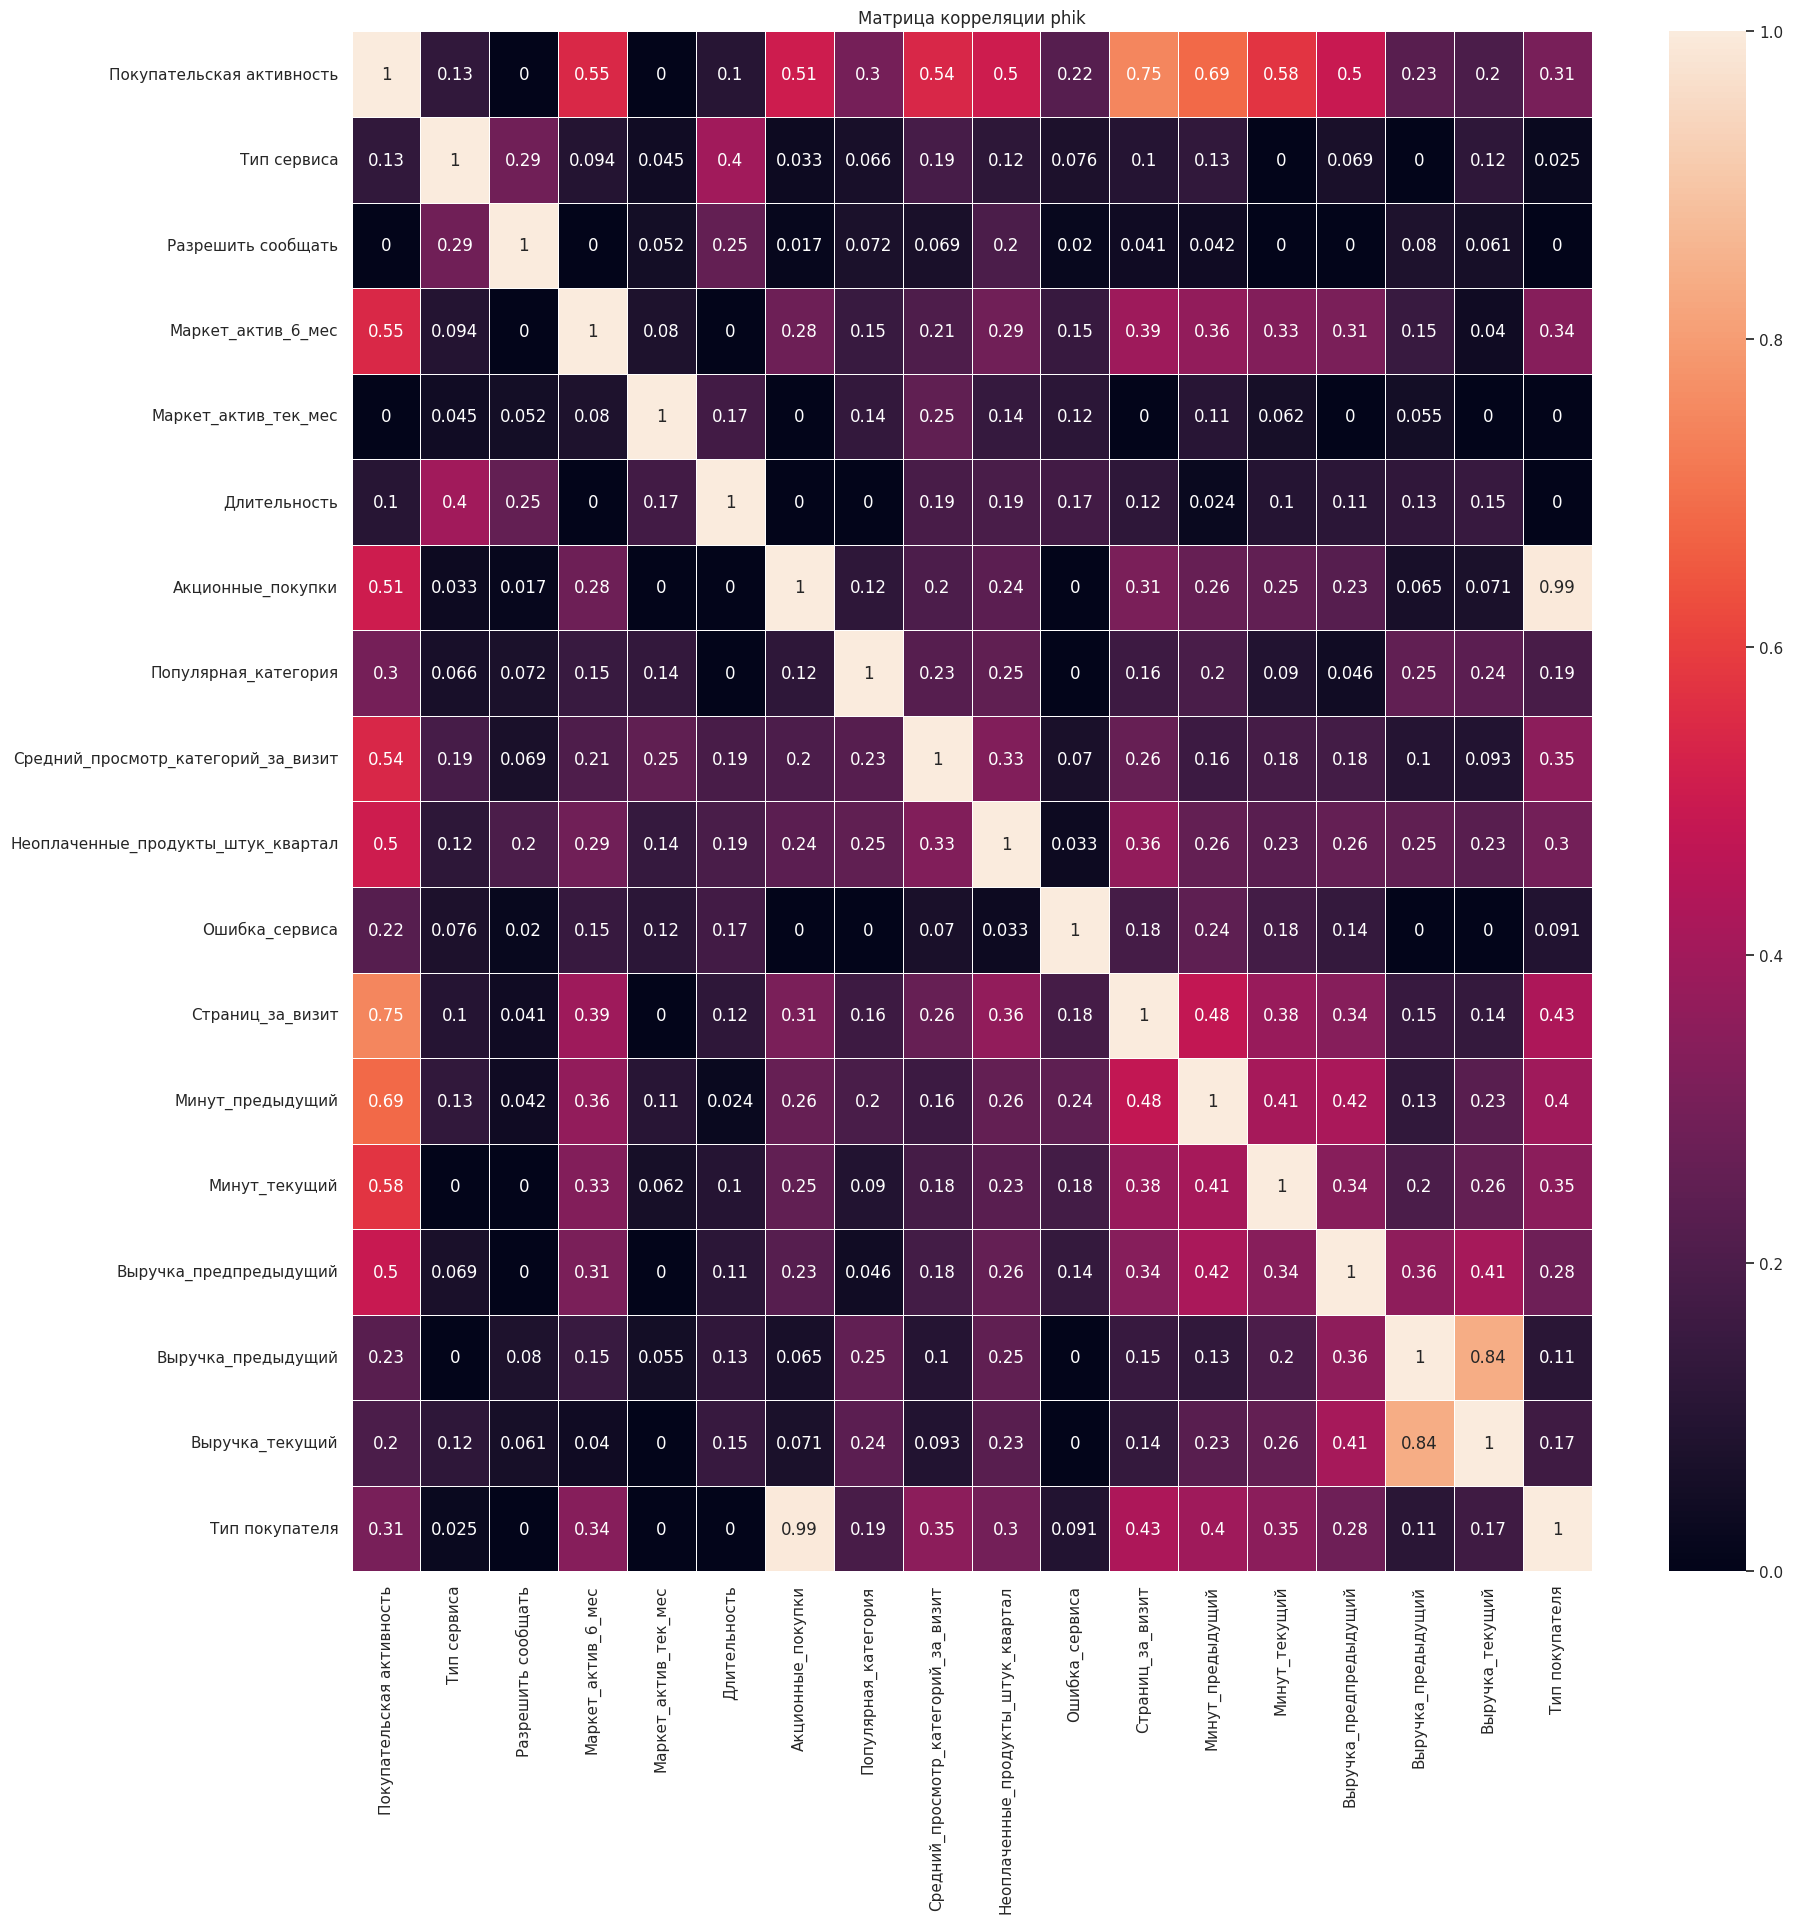

In [47]:
fig, ax = plt.subplots(figsize=(20,20))         
ax = sns.heatmap(df_all.iloc[:,1:].phik_matrix(), annot=True, linewidth=.5, ax=ax)\
    .set_title('Матрица корреляции phik')

### Выводы
- мультиколлинеарность обычно считают при корреляции в 0,9 и выше, у нас такое значение у созданного выше параметра Тип покупателя и Акционные_покупки. Удалим Акционные_покупки, чем упростим входящие данные. 


## Использование пайплайнов
<a id='link8'></a>

Оверсемплинг данных не считаю что нужно делать, так как у нас доли классов 0.4/0.6, это близкие значения, нет преобладания какого-либо класса.

In [48]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [49]:
# разбиваем выборку
X_train, X_test, y_train, y_test = train_test_split(
    df_all.drop(['Покупательская активность', 'Акционные_покупки', 'id'], axis=1),
    df_all['Покупательская активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = df_all['Покупательская активность'])

X_train.shape, X_test.shape

((972, 16), (325, 16))

In [50]:
df_all.columns

Index(['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит', 'Минут_предыдущий', 'Минут_текущий',
       'Выручка_предпредыдущий', 'Выручка_предыдущий', 'Выручка_текущий',
       'Тип покупателя'],
      dtype='object')

In [51]:
df_all.head(2)

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215349                 Снизилась     премиум                 да   
1  215350                 Снизилась    стандарт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                4.40                     4           819               0.75   
1                4.90                     3           539               0.14   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    4   
1    Домашний текстиль                                    5   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
0                                   4               2                 5   
1                                   2               1                 5   

   Минут_предыдущий  Минут_текущий  Выручка_предпредыдущий  \
0                12             10                 4472.00   
1                 8             13                 4826.00   

   Выручка_предыдущий  Выручка_текущий   Тип покупателя  
0             5216.00          4971.60  Много_акционных  
1             5457.50          5058.40   Мало_акционных

In [52]:
df_all['Тип покупателя'].unique()

array(['Много_акционных', 'Мало_акционных', 'Средне_акционных'],
      dtype=object)

In [53]:
# создаём списки с названиями признаков
ohe_columns = ['Тип сервиса', 'Разрешить сообщать', 'Популярная_категория']
ord_columns = ['Тип покупателя'] 
num_columns = ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Средний_просмотр_категорий_за_визит',
              'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'Минут_предыдущий', 'Минут_текущий',
              'Выручка_предпредыдущий', 'Выручка_предыдущий', 'Выручка_текущий']

In [55]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)),
     ('simpleImputer_after_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
    )

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['Мало_акционных', 'Средне_акционных', 'Много_акционных']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE,
                                     max_depth=6,
                                     max_features=18,
                                     min_samples_split=5))
])
print(pipe_final)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('simpleImputer_after_ohe',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Тип сервиса',
   

Для теста моделей выберем метрику ROC-AUС, так как это всеохватывающая метрика качества классификации. Она учитывает работу модели при всех возможных значениях порогов и поэтому не зависит от одного конкретного.

Для перебора гиперпараметров используем RandomizedSearchCV - как более быстрый, так параметров много и несколько моделей. 

In [58]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 7),
        'models__max_features': range(1, 20),
        'models__min_samples_split': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors' : range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(),  'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    # словарь для SVC()
    {
        'models': [SVC(
            random_state=RANDOM_STATE, 
            kernel = 'poly', 
            degree = 6
        )],
        'models__C': [0.1,1,10],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }  
]

In [59]:
# сделаем перебор гиперпаратеров через RandomizedSearchCV
start_time = time.time()
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)


y_test_pred = randomized_search.predict(X_test)
y_test_pred_prob = randomized_search.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred_prob[:,1])}')
print('Время исполнения кода:', time.time() - start_time)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('simpleImputer_after_ohe',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                     

In [60]:
start_time = time.time()
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

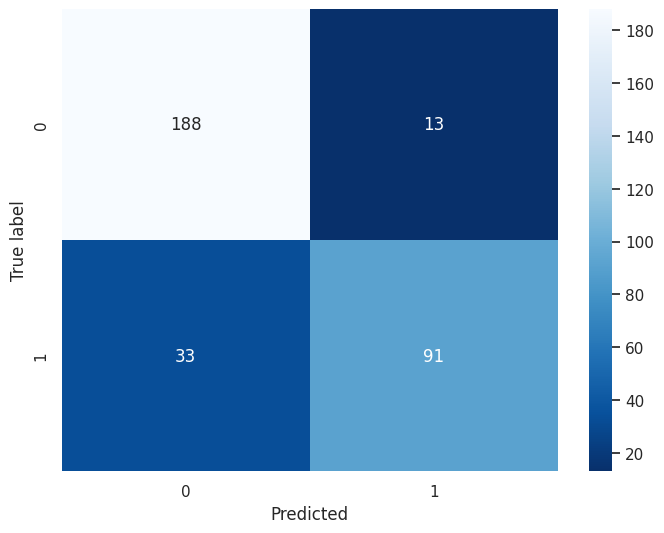

In [62]:
# построим матрицу ошибок
sns.set(rc={'figure.figsize':(8,6)})

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

In [63]:
# сделаем перебор гиперпараметров через GridSearchCV
# start_time = time.time()
# grid_search = GridSearchCV(
#     pipe_final, 
#     param_grid, 
#     cv=5,
#     scoring='roc_auc',
#     n_jobs=-1
# )
# grid_search.fit(X_train, y_train)

# print('Лучшая модель и её параметры:\n\n', grid_search.best_estimator_)
# print ('Метрика лучшей модели на тренировочной выборке:', grid_search.best_score_)


# y_test_pred = grid_search.predict(X_test)
# y_test_pred_prob = grid_search.predict_proba(X_test)
# print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred_prob[:,1])}')
# print('Время исполнения кода:', time.time() - start_time)

Закоментил блок для проверки так как долго выполнятется. Итогом его такие параметры:

- DecisionTreeClassifier(max_depth=6, max_features=10,min_samples_split=9,random_state=42))])
- Метрика лучшей модели на тренировочной выборке: 0.869799255453801
- Метрика ROC-AUC на тестовой выборке: 0.8523912694591559
- Время исполнения кода: 456.7913088798523

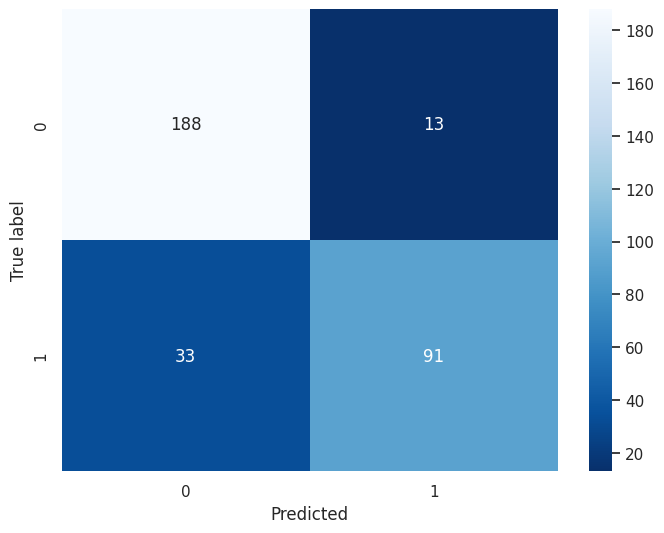

In [64]:
# построим матрицу ошибок
sns.set(rc={'figure.figsize':(8,6)})

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

Корректно определили на тестовой выборке 95 покупателей кто снижает свою покупательскую активность и ошибочно определили к этому классу 21 покупателей. 29 покупателей модель классифицирована неверно не присвоив им класс "Снизили активность".

### Вывод
- Время поиска лучшей модели конечно же гораздо (1.3 против 400+) больше у GridSearchCV, при этом метрики на тестовой выборке близки 0,86
- Лучшая модель это  DecisionTreeClassifier с параметрами
    - Глубина дерева max_depth=6,
    - Макисмальное кол-во параметров max_features=10,
    - Минимальное количество семплов на разделение на классы - min_samples_split=9

## Анализ важности признаков 
<a id='link9'></a>

In [65]:
pipe_final.fit(X_train, y_train)
print('Importance', randomized_search.best_estimator_.named_steps["models"].feature_importances_)
print('Feature', pipe_final[:-1].get_feature_names_out())

Importance [0.         0.         0.00766129 0.         0.         0.00892133
 0.         0.34256659 0.03738509 0.         0.01099899 0.03183182
 0.00838994 0.0196444  0.25928226 0.08268375 0.12456151 0.05064909
 0.01542393 0.        ]
Feature ['ohe__Тип сервиса_стандарт' 'ohe__Разрешить сообщать_нет'
 'ohe__Популярная_категория_Косметика и аксесуары'
 'ohe__Популярная_категория_Кухонная посуда'
 'ohe__Популярная_категория_Мелкая бытовая техника и электроника'
 'ohe__Популярная_категория_Техника для красоты и здоровья'
 'ohe__Популярная_категория_Товары для детей' 'ord__Тип покупателя'
 'num__Маркет_актив_6_мес' 'num__Маркет_актив_тек_мес' 'num__Длительность'
 'num__Средний_просмотр_категорий_за_визит'
 'num__Неоплаченные_продукты_штук_квартал' 'num__Ошибка_сервиса'
 'num__Страниц_за_визит' 'num__Минут_предыдущий' 'num__Минут_текущий'
 'num__Выручка_предпредыдущий' 'num__Выручка_предыдущий'
 'num__Выручка_текущий']


In [66]:
data_preprocessor.fit(X_train, y_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('simpleImputer_ohe',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False)),
                                                 ('simpleImputer_after_ohe',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Тип сервиса', 'Разрешить сообщать',
                                  'Популярная_категория']),...
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Тип покупателя']),
                                ('num', MinMaxScaler(),
                                 ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес',
                                  'Длительность',
                                  'Средний_просмотр_категорий_за_визит',
                                  'Неоплаченные_продукты_штук_квартал',
                                  'Ошибка_сервиса', 'Страниц_за_визит',
                                  'Минут_предыдущий', 'Минут_текущий',
                                  'Выручка_предпредыдущий',
                                  'Выручка_предыдущий', 'Выручка_текущий'])])

In [67]:
X_train_pipe = data_preprocessor.transform(X_train)
X_test_pipe = data_preprocessor.transform(X_test)

model = DecisionTreeClassifier(random_state=RANDOM_STATE,
                            max_depth=6, max_features=10, min_samples_split=9)
model.fit(X_train_pipe, y_train)
y_pred_dt = model.predict(X_test_pipe)
y_prob_dt = model.predict_proba(X_test_pipe)
print ('Метрика ROC-AUC:', roc_auc_score(y_test, y_prob_dt[:,1]))

Метрика ROC-AUC: 0.8573663938372654


In [68]:
X_test_pipe = pd.DataFrame(X_test_pipe, columns=pipe_final[:-1].get_feature_names_out())

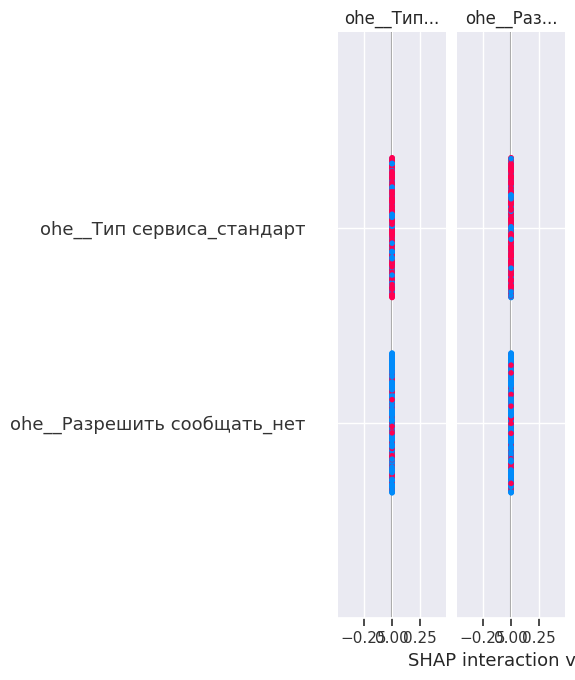

In [69]:
explainer = shap.Explainer(model, X_test_pipe)
shap_values = explainer.shap_values(X_test_pipe)
shap.summary_plot(shap_values, X_test_pipe, plot_size = (20, 10))

In [70]:
# К сожалению не разобрался почему shap дает ошибку на вот этих графиках
# shap.plots.waterfall(shap_values[0], max_display=14) # The waterfall plot requires an `Explanation` object as the `shap_values` argument.
# shap.plots.beeswarm(shap_values) # The beeswarm plot requires an `Explanation` object as the `shap_values` argument.

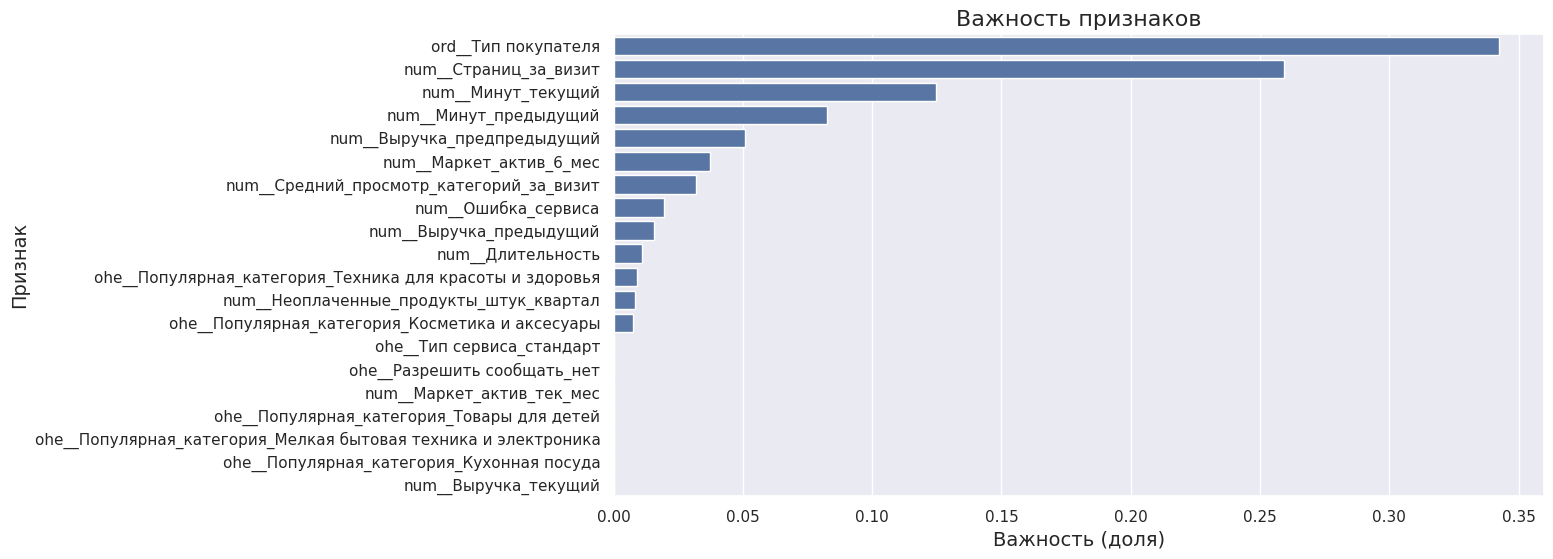

In [71]:
# Используем встроенные методы объяснения модели для дерева решений
# формируем таблицу важности признаков и сортируем её
feature_names = pipe_final[:-1].get_feature_names_out()
feature_importances = pd.DataFrame(
    {
        'Feature': feature_names,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=feature_importances, x='Importance', y='Feature')

# добавляем названия графика и осей
ax.set_title('Важность признаков', fontsize=16)
ax.set_xlabel('Важность (доля)', fontsize=14)
ax.set_ylabel('Признак', fontsize=14)

# отображаем график
plt.show()

Самый важный признак это *Тип покупателя* (акционный он или нет). 
Так же важны *Страниц_за_визит*, *Минут_текущий* и *Минут_предыдущий* - количество минут на сайте
Менее важны:
   - Кол-во просомтрров категорий за визит
   - Выручка за позапрошлый месяц
   - Неоплаченные продукты_штук_квартал
   - Маркет_активн_6_мес
   - Ошибка сервиса
   - Популярная категория - Товары для красоты и здоровья.


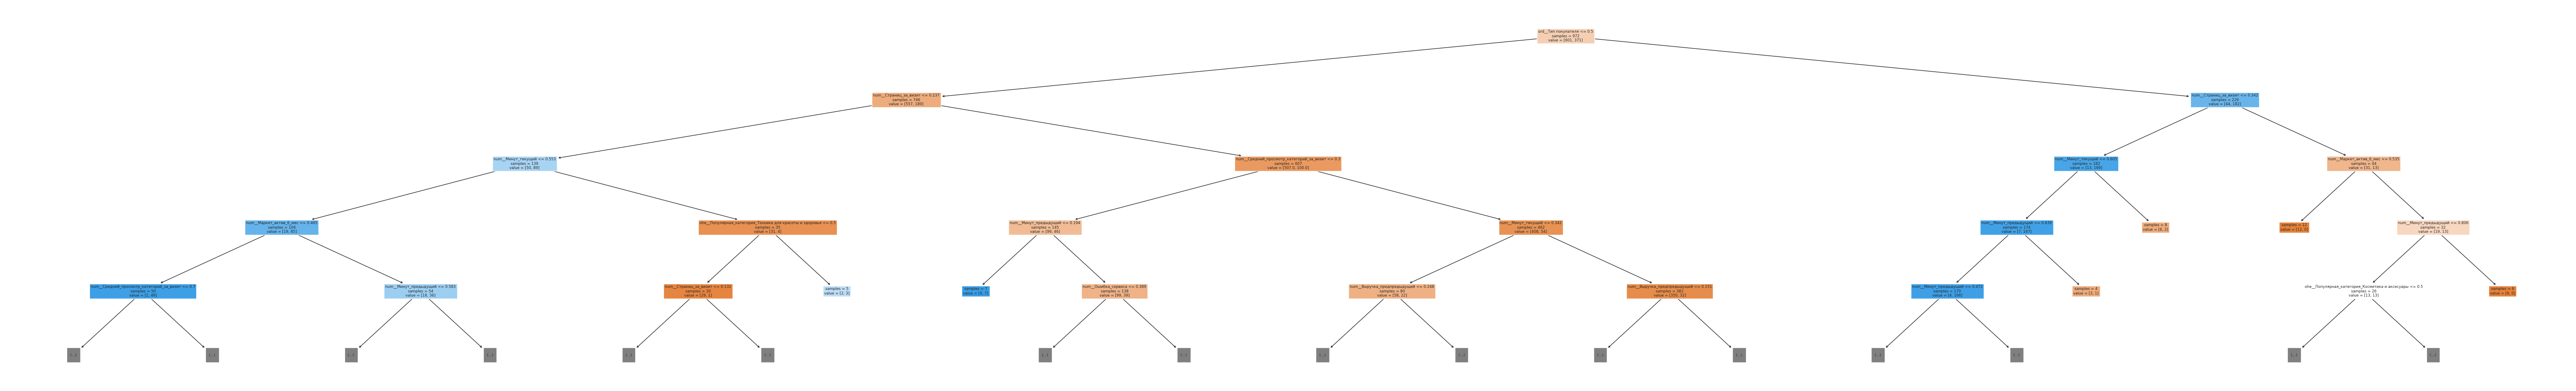

In [72]:
plt.figure(figsize=(80, 12))
ax = plot_tree(model, max_depth=4, filled=True, impurity=False, feature_names=feature_names) 

Из графика-дерева видно что опять же важным параметром являются Тип покупателя (акционный или нет),  Количество страниц за визит и время проведенное на нем (минут). 
- Можно предложить рекомендовать тем у кого снижается активность на сайте специализированные рассылки/пуши


In [73]:
# Попробуем без масштабирования признаков чтобы видеть какие значения дает дерево решений. 
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
    ], 
    remainder='passthrough'
)

data_preprocessor.fit(X_train, y_train)

X_train_pipe = data_preprocessor.transform(X_train)
X_test_pipe = data_preprocessor.transform(X_test)

model = DecisionTreeClassifier(random_state=RANDOM_STATE,
                               max_depth=6, max_features=10,
                                        min_samples_split=9)
model.fit(X_train_pipe, y_train)
y_pred_dt = model.predict(X_test_pipe)
y_prob_dt = model.predict_proba(X_test_pipe)
print ('Метрика ROC-AUC:', roc_auc_score(y_test, y_prob_dt[:,1])) # 0.8523912694591559

Метрика ROC-AUC: 0.8573663938372654


Метрика не снизилась как и ожидалось - масштабирование не влияет при алгоритме DecisionTreeClassifier

In [74]:
text_representation = export_text(
    model,
    feature_names=feature_names,
    max_depth=5
)
print(text_representation)

|--- ord__Тип покупателя <= 0.50
|   |--- num__Страниц_за_визит <= 5.50
|   |   |--- num__Минут_текущий <= 14.50
|   |   |   |--- num__Маркет_актив_6_мес <= 3.55
|   |   |   |   |--- num__Средний_просмотр_категорий_за_визит <= 4.50
|   |   |   |   |   |--- class: Снизилась
|   |   |   |   |--- num__Средний_просмотр_категорий_за_визит >  4.50
|   |   |   |   |   |--- class: Прежний уровень
|   |   |   |--- num__Маркет_актив_6_мес >  3.55
|   |   |   |   |--- num__Минут_предыдущий <= 15.50
|   |   |   |   |   |--- num__Выручка_предпредыдущий <= 4885.00
|   |   |   |   |   |   |--- class: Снизилась
|   |   |   |   |   |--- num__Выручка_предпредыдущий >  4885.00
|   |   |   |   |   |   |--- class: Прежний уровень
|   |   |   |   |--- num__Минут_предыдущий >  15.50
|   |   |   |   |   |--- num__Выручка_предыдущий <= 5612.00
|   |   |   |   |   |   |--- class: Прежний уровень
|   |   |   |   |   |--- num__Выручка_предыдущий >  5612.00
|   |   |   |   |   |   |--- class: Снизилась
|   |   |--

### Вывод
Самый важный признак это *Тип покупателя* (акционный он или нет). 
Так же важны *Страниц_за_визит*, *Минут_текущий* и *Минут_предыдущий* - количество минут на сайте
Менее важны:
   - Кол-во просомтрров категорий за визит
   - Выручка за позапрошлый месяц
   - Неоплаченные продукты_штук_квартал
   - Маркет_активн_6_мес
   - Ошибка сервиса
   - Популярная категория - Товары для красоты и здоровья.

Теперь мы можем порекомендовать магазину «В один клик» конкретные занчения после которых есть риск снижения покупателской активности:
   - покупка более 0,5-0,6 (в долях) акционных товаров
   - 5 страниц и меньше за визит
   - Неоплаченные_продукты_штук_квартал >  5.50 (брошенные корзины с большин кол-вом товаров)
   - На сайте менее 14,5 минут

## Сегментация покупателей 
<a id='link10'></a>

### Сегмент - покупатели акционных товаров 
Выделим сегмент покупателей, проанализируем его и предложим, как увеличить его покупательскую активность. 

- Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.

Обоснование: как видели выше Тип покупателя (акционные покупки у него или нет), является самым важным признаком при классификации покупателей снизится или нет у него активность. 

In [75]:
X = df_all.drop(['Покупательская активность'], axis=1)
y = df_all['Покупательская активность']

X_trans = data_preprocessor.transform(X)

y_pred_all = model.predict(X_trans)
y_prob_all = model.predict_proba(X_trans)
print ('Метрика ROC-AUC на всем датасете:', roc_auc_score(y, y_prob_all[:,1])) 

Метрика ROC-AUC на всем датасете: 0.9131199778331948


In [76]:
df_all['Предсказанная активность'] = y_pred_all
df_all['Вероятность'] = y_prob_all[:,1]
df_all['Верно предсказанно'] = (df_all['Предсказанная активность'] == df_all['Покупательская активность'])
df_all[['Покупательская активность','Предсказанная активность', 'Верно предсказанно', 'Вероятность']].head(10)

Покупательская активность Предсказанная активность  Верно предсказанно  \
0                 Снизилась                Снизилась                True   
1                 Снизилась                Снизилась                True   
2                 Снизилась                Снизилась                True   
3                 Снизилась                Снизилась                True   
4                 Снизилась                Снизилась                True   
5                 Снизилась                Снизилась                True   
6                 Снизилась                Снизилась                True   
7                 Снизилась                Снизилась                True   
8                 Снизилась                Снизилась                True   
9                 Снизилась                Снизилась                True   

   Вероятность  
0         1.00  
1         1.00  
2         1.00  
3         1.00  
4         1.00  
5         1.00  
6         1.00  
7         1.00  
8         1.00  
9         1.00

In [77]:
# Добавим данные по прибыли
df_all = df_all.merge(df_money, on='id')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1297 non-null   int64  
 1   Покупательская активность            1297 non-null   object 
 2   Тип сервиса                          1297 non-null   object 
 3   Разрешить сообщать                   1297 non-null   object 
 4   Маркет_актив_6_мес                   1297 non-null   float64
 5   Маркет_актив_тек_мес                 1297 non-null   int64  
 6   Длительность                         1297 non-null   int64  
 7   Акционные_покупки                    1297 non-null   float64
 8   Популярная_категория                 1297 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1297 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 11  Ошибка_сервиса                

In [78]:
# построим скаттрплот с вероятностими попадания в класс и акционными покупками
fig = px.scatter(df_all, x="Вероятность", y="Акционные_покупки", color="Прибыль")
fig.show()

На основе скатерплота видно что интерсующий нассегмент находиться в правом верхнем квадрате:
    - Акционные покупки > 0.7
    - Вероятность попасть в сегмент "Снизилась" > 0.8

Выделим этот сегмент

In [79]:
# Выделим сегмент 
# Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.
df_action_risk = df_all.loc[(df_all['Акционные_покупки'] > 0.7) & (df_all['Вероятность'] > 0.8), :]

# для сравнения выделим пртсо покупателей кто покупает много акционных товаров
df_action = df_all.loc[(df_all['Акционные_покупки'] > 0.7), :]

df_action_risk.describe(include='all').T

count unique               top freq  \
id                                  120.00    NaN               NaN  NaN   
Покупательская активность              120      2         Снизилась  119   
Тип сервиса                            120      2          стандарт   74   
Разрешить сообщать                     120      2                да   89   
Маркет_актив_6_мес                  120.00    NaN               NaN  NaN   
Маркет_актив_тек_мес                120.00    NaN               NaN  NaN   
Длительность                        120.00    NaN               NaN  NaN   
Акционные_покупки                   120.00    NaN               NaN  NaN   
Популярная_категория                   120      6  Товары для детей   39   
Средний_просмотр_категорий_за_визит 120.00    NaN               NaN  NaN   
Неоплаченные_продукты_штук_квартал  120.00    NaN               NaN  NaN   
Ошибка_сервиса                      120.00    NaN               NaN  NaN   
Страниц_за_визит                    120.00    NaN               NaN  NaN   
Минут_предыдущий                    120.00    NaN               NaN  NaN   
Минут_текущий                       120.00    NaN               NaN  NaN   
Выручка_предпредыдущий              120.00    NaN               NaN  NaN   
Выручка_предыдущий                  120.00    NaN               NaN  NaN   
Выручка_текущий                     119.00    NaN               NaN  NaN   
Тип покупателя                         120      1   Много_акционных  120   
Предсказанная активность               120      1         Снизилась  120   
Вероятность                         120.00    NaN               NaN  NaN   
Верно предсказанно                     120      2              True  119   
Прибыль                             120.00    NaN               NaN  NaN   
Прибыль, руб                        120.00    NaN               NaN  NaN   

                                         mean    std       min       25%  \
id                                  215563.91 166.72 215349.00 215444.25   
Покупательская активность                 NaN    NaN       NaN       NaN   
Тип сервиса                               NaN    NaN       NaN       NaN   
Разрешить сообщать                        NaN    NaN       NaN       NaN   
Маркет_актив_6_мес                       3.53   1.10      0.90      3.00   
Маркет_актив_тек_мес                     3.99   0.67      3.00      4.00   
Длительность                           615.96 227.05    167.00    458.00   
Акционные_покупки                        0.94   0.04      0.74      0.93   
Популярная_категория                      NaN    NaN       NaN       NaN   
Средний_просмотр_категорий_за_визит      2.57   1.15      1.00      2.00   
Неоплаченные_продукты_штук_квартал       4.05   2.49      0.00      2.00   
Ошибка_сервиса                           4.04   1.86      1.00      3.00   
Страниц_за_визит                         4.38   2.18      1.00      3.00   
Минут_предыдущий                         9.99   2.62      5.00      8.00   
Минут_текущий                           10.37   2.72      4.00      9.00   
Выручка_предпредыдущий                4637.78 236.62   4098.00   4463.50   
Выручка_предыдущий                    4964.60 833.67   3146.00   4447.12   
Выручка_текущий                       5245.93 893.64   3232.20   4614.45   
Тип покупателя                            NaN    NaN       NaN       NaN   
Предсказанная активность                  NaN    NaN       NaN       NaN   
Вероятность                              1.00   0.00      1.00      1.00   
Верно предсказанно                        NaN    NaN       NaN       NaN   
Прибыль                                  3.79   0.91      1.63      3.13   
Прибыль, руб                          3790.25 913.39   1630.00   3127.50   

                                          50%       75%       max  
id                                  215537.50 215654.25 216595.00  
Покупательская активность                 NaN       NaN       NaN  
Тип сервиса                    

#### Описание сегмента:
   - всего 125 покупателей в этом сегменте
   - самая популярная категория - *Товары для детей*
   - чаще всего это покупатели из *стандарт* сервиса
   - они разрешили рассылку рекламных уведомлений
   - в среднем они зарегестрировались 611 дней назад
   - доля акционных покупок составляет 94%!
   - Страниц_за_визит в среднем 4,4
   - Минут на сайте в среднем около 10

In [80]:
# построим скаттрплот с вероятностими попадания в класс и прибылью
fig = px.scatter(df_action_risk, x="Вероятность", y="Прибыль", color="Маркет_актив_тек_мес", width=600, height=400)
fig.show()

На Прибыль вероятность попадания в класс не сильно влияет.

In [81]:
def rename_period(val):
    if val == 'предпредыдущий_месяц':
        return -2
    elif val == 'предыдущий_месяц':
        return -1
    else:
        return 0

df_market_money['Период_num'] = df_market_money['Период'].apply(rename_period)
df_market_money['Период_num'].unique()

array([-2,  0, -1])

In [82]:
# сгруппируем данные так чтобы мы видели в динамике выручку
df = df_market_money.merge(df_action_risk, on='id', how='inner')
fig = px.bar(df, x='Период_num', y='Выручка', width=600, height=400)
fig.show()

Суммарно выручка растет по этому сегменту.

In [83]:
df_market_time['Период_num'] = df_market_time['Период'].apply(rename_period)
df_market_time['Период_num'].unique()

array([ 0, -1])

In [84]:
# сгруппируем данные так чтобы мы видели в динамике Минут на сайте
df = df_market_time.merge(df_action_risk, on='id', how='inner')
fig = px.bar(df, x='Период_num', y='минут', width=600, height=400)
fig.show()

Времени этот сегмент также стал проводить чуть больше.

In [85]:
filtred_column = ['Маркет_актив_тек_мес', 'Длительность', 'Средний_просмотр_категорий_за_визит',
                 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
                 'Страниц_за_визит', 'Минут_предыдущий', 'Минут_текущий', 'Выручка_предпредыдущий',
                 'Выручка_предыдущий', 'Выручка_текущий', 'Прибыль', 'Акционные_покупки']

# plt.figure(figsize=(8,5))


for col in filtred_column:
    # построим скаттрплот с вероятностими попадания в класс и акционными покупками
    fig = px.scatter(df_action_risk, x="Вероятность", y=col, color="Прибыль", width=600, height=400)
    fig.show()

очень много покупателей имеют вероятность = 1, поэтому эти скаттерплот млоинформативны в данном случает

In [86]:
filtred_column = ['Маркет_актив_тек_мес', 'Длительность', 'Средний_просмотр_категорий_за_визит',
                 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
                 'Страниц_за_визит', 'Минут_предыдущий', 'Минут_текущий', 'Выручка_предпредыдущий',
                 'Выручка_предыдущий', 'Выручка_текущий', 'Прибыль', 'Акционные_покупки']

list_id = list(df_all.loc[(df_all['Акционные_покупки'] > 0.7) & (df_all['Вероятность'] > 0.8), 'id'])

def create_segm(id):
    if id in list_id:
        return 'segment'
    else:
        return 'non_segment'
    
df_all['Анализируемый сегмент'] = df_all['id'].apply(create_segm)

df_gr_all = df_all.groupby('Анализируемый сегмент')[filtred_column].agg('mean')
df_gr_all.T

Анализируемый сегмент                non_segment  segment
Маркет_актив_тек_мес                        4.01     3.99
Длительность                              601.67   615.96
Средний_просмотр_категорий_за_визит         3.34     2.57
Неоплаченные_продукты_штук_квартал          2.72     4.05
Ошибка_сервиса                              4.20     4.04
Страниц_за_визит                            8.58     4.38
Минут_предыдущий                           13.82     9.99
Минут_текущий                              13.50    10.37
Выручка_предпредыдущий                   4856.61  4637.78
Выручка_предыдущий                       4946.68  4964.60
Выручка_текущий                          5237.30  5245.93
Прибыль                                     4.02     3.79
Акционные_покупки                           0.26     0.94

In [87]:
def p_value_check(pvalue, alpha = 0.05):
    """
    функция выдает текстовый ответ на стат.значимость теста: 
    отвергаем или подтверждаем нулевую гипотезу.
    """
    print(f'p-value: {results.pvalue}')
    # проверяем p-value
    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Нет оснований отвергнуть нулевую гипотезу')

alpha = 0.05 # уровень статистической значимости

In [88]:
for col in filtred_column:
    # зададим первую сравниваемую группу
    first_group_total = df_all.loc[df_all['Анализируемый сегмент']=='segment', col]
    # зададим первую сравниваемую группу
    second_group_total  = df_all.loc[df_all['Анализируемый сегмент']=='non_segment', col]
    # делаем т-тест
    results = st.ttest_ind(first_group_total, second_group_total)
    # проверяем результат
    print('Делаем ttest для параметра', col)
    p_value_check(results.pvalue, alpha)
    print()

Делаем ttest для параметра Маркет_актив_тек_мес
p-value: 0.7715378475356589
Нет оснований отвергнуть нулевую гипотезу

Делаем ttest для параметра Длительность
p-value: 0.5497211217488832
Нет оснований отвергнуть нулевую гипотезу

Делаем ttest для параметра Средний_просмотр_категорий_за_визит
p-value: 2.1314604157098937e-09
Отвергаем нулевую гипотезу

Делаем ttest для параметра Неоплаченные_продукты_штук_квартал
p-value: 1.1722753561930244e-12
Отвергаем нулевую гипотезу

Делаем ttest для параметра Ошибка_сервиса
p-value: 0.400817820054176
Нет оснований отвергнуть нулевую гипотезу

Делаем ttest для параметра Страниц_за_визит
p-value: 1.5290507013624567e-29
Отвергаем нулевую гипотезу

Делаем ttest для параметра Минут_предыдущий
p-value: 3.555000858804354e-25
Отвергаем нулевую гипотезу

Делаем ttest для параметра Минут_текущий
p-value: 4.555833151834774e-15
Отвергаем нулевую гипотезу

Делаем ttest для параметра Выручка_предпредыдущий
p-value: 4.921987144691717e-12
Отвергаем нулевую гипотез

#### Сравнение количественных параметров у сегмента и всех покупателей
- Мы можем отвергнуть гипотезу о равенстве средних в сегментах по следующим признакам, то есть различия значимы:
    - Средний_просмотр_категорий_за_визит
    - Страниц_за_визит
    - Минут_предыдущий
    - Минут_текущий
    - Неоплаченные_продукты_штук_квартал
    - Выручка_предпредыдущий
    
Четрый из шести параметров относятся в поведению пользователей на сайте. Это еще раз говорит что рузультаты моделирования описывают важные параметры для сегментации. Для этого сегмента рекомендуется персонализировать маркетинговую активность на акционные товары, и возможно ее усилить - так покупатели чаще смогут заходить на страницы с акциоными товарами.

Так же можно делать рассылку по "Оставленной корзине" - возможно предлагать персональную скидку на эти товары, так как этот сегмент и так является "охотниками за акциями" 

Еще выделяется тот факт что предпредудщий месяц у этой категгории была значимо меньшая выручка. Гипотеза: в этот период не было акционной активности или она не была в любимых товарных группах этогого сегмента.

In [89]:
# оценим любимые категории в сегменте "Охотников за акциями"
df_gr = df_all.groupby(['Популярная_категория', 'Анализируемый сегмент'])['Анализируемый сегмент']\
.agg(['count']).reset_index().sort_values(by='count', ascending=True)
# display(df_gr)
fig = px.bar(df_gr, y='Популярная_категория', x="count",
             color='Анализируемый сегмент', barmode='group', 
             height=400, orientation='h')
fig.show()

#### любимые категории в сегменте "Охотников за акциями"
- Товары для детей являются любимой категорией как у всех покупателй, так и в анализируемом сегменте.
- При этом отрыв от следующей популярной категории в сегменте больше, чем в общем в 1,7 раза, против в 1,3 раза в не сегменте.
- Косметика и аксесуары на вторм месте у сегмента, при том чт ов целом по покпутелям это 3 категория
- Так же Кухонная посуда является более популярной категорией у этой группы людей, она на 4 месте, против 6 у всех остальных. 

Можно предположить что в сегменте много женщин - покупки связанные с детьми, косметикой и кухонной посудой. 

Рекомендации продвигать для этого сегмента ТОвары для детей, кухонную посуду и Товары для красоты и здоровья как "комплиментарные" к товарам из первых двух категорий. 



#### Вывод по сегменту:

Описание сегмента:
   - всего 125 покупателей в этом сегменте
   - самая популярная категория - *Товары для детей*
   - чаще всего это покупатели из *стандарт* сервиса
   - они разрешили рассылку рекламных уведомлений
   - в среднем они зарегестрировались 611 дней назад
   - доля акционных покупок составляет 94%!
   - Страниц_за_визит в среднем 4,4
   - Минут на сайте в среднем около 10
   
В динамике этот сегмент показывает рост выручки
За последний месяц в сегменте стали проводить больше времени на сайте - это говрит об возможной эффектиности идущих акций напрвленных на этот сегмент.

Очень значимы для определения этого сегмента признаки:
    - Средний_просмотр_категорий_за_визит
    - Страниц_за_визит
    - Минут_предыдущий
    - Минут_текущий
    - Неоплаченные_продукты_штук_квартал
    - Выручка_предпредыдущий
    
Четрый из шести параметров относятся в поведению пользователей на сайте. Это еще раз говорит что рузультаты моделирования описывают важные параметры для сегментации. Для этого сегмента рекомендуется персонализировать маркетинговую активность на акционные товары, и возможно ее усилить - так покупатели чаще смогут заходить на страницы с акциоными товарами.

Так же можно делать рассылку по "Оставленной корзине" - возможно предлагать персональную скидку на эти товары, так как этот сегмент и так является "охотниками за акциями" 

Еще выделяется тот факт что предпредудщий месяц у этой категгории была значимо меньшая выручка. Гипотеза: в этот период не было акционной активности или она не была в любимых товарных группах этогого сегмента.


## Общий вывод 
<a id='link11'></a>

### Задача
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

Нашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

### Исходные данные и предобработка
У нас есть данные по 
    - Продуктовому поведени
    - Коммуникации с клиентом
    - Поведение на сайте
    - Финансовое поведение
    
Мы взяли на вход данные по кажому покупатели и сдели их предоработку:
 - убрали выбросы в Выручке
 - убрали опчеатки в значения колонки Период
 - перевели в колонке df_money['Прибыль'] тыс. рублей в рубли
 - объеденили данные и построили модели на общем датасете
 - создали новый категориальный параметр Тип покупателя на основе количественного Акционные_покупки. Выделили три сегмента:
     - 'Мало_акционных'
     - 'Средне_акционных'
     - 'Много_акционных'

### Моделирование
Для прогнозирования параметра "Покупательская активность" мы сделали пайплайн в которм нашли лучшую модель классификации по метрике ROС-AUC. Рассматривали модели с разными гиперпараметрами:
 - DecisionTreeClassifier
 - LogisticRegression
 - KNeighborsClassifier
 - SVC
 
Победила модель DecisionTreeClassifier с параметрами
 - Глубина дерева max_depth=5,
 - Макисмальное кол-во параметров max_features=13,
 - Минимальное количество семплов на разделение на классы - min_samples_split=4
 
### Анализ модели  и рекомндации
Самый важный признак это *Страниц_за_визит*
Так же важны *Минут_текущий* - количество минут на сайте в текущем месяце и *Тип покупателя* (акционный он или нет). 
Менее важны:
   - Кол-во просомтрров категорий за визит
   - выручка за прошлый месяц
   - популярная категория - Товары для детей.

Теперь мы можем порекомендовать магазину «В один клик» конкретные занчения после которых есть риск снижения покупателской активности:
   - 5 старниц и меньше за визит
   - Минут_предыдущий <= 11.50 и Выручка_предпредыдущий <= 4955.50
   - Неоплаченные_продукты_штук_квартал >  5.50 (брошенные корзины с большин кол-вом товаров)
   
### Анализ отдельного сегмента и рекомендации

Описание сегмента:
   - всего 125 покупателей в этом сегменте
   - самая популярная категория - *Товары для детей*
   - чаще всего это покупатели из *стандарт* сервиса
   - они разрешили рассылку рекламных уведомлений
   - в среднем они зарегестрировались 611 дней назад
   - доля акционных покупок составляет 94%!
   - Страниц_за_визит в среднем 4,4
   - Минут на сайте в среднем около 10
   
В динамике этот сегмент показывает рост выручки
За последний месяц в сегменте стали проводить больше времени на сайте - это говорит об возможной эффектиности идущих акций напрвленных на этот сегмент.

Очень значимы для определения этого сегмента признаки:
    - Средний_просмотр_категорий_за_визит
    - Страниц_за_визит
    - Минут_предыдущий
    - Минут_текущий
    - Неоплаченные_продукты_штук_квартал
    - Выручка_предпредыдущий
    
Четрый из шести параметров относятся в поведению пользователей на сайте. Это еще раз говорит что рузультаты моделирования описывают важные параметры для сегментации. Для этого сегмента рекомендуется персонализировать маркетинговую активность на акционные товары, и возможно ее усилить - так покупатели чаще смогут заходить на страницы с акциоными товарами.

Так же можно делать рассылку по "Оставленной корзине" - возможно предлагать персональную скидку на эти товары, так как этот сегмент и так является "охотниками за акциями" 

Еще выделяется тот факт что предпредудщий месяц у этой категгории была значимо меньшая выручка. Гипотеза: в этот период не было акционной активности или она не была в любимых товарных группах этогого сегмента.

Рекомендации:
 - продвигать товары для женщин - красота и уход
 - можно усилить рекламную рассылку, этот сегмент не запрещает ее в среднем
 - возможно нужна переработка предложения акционного - больший упор на релевантные категории